## 1.Implementa√ß√£o de uma MLP para Reconhecimento de D√≠gitos

Este material did√°tico aborda a implementa√ß√£o de uma Rede Multilayer Perceptron (MLP) para o reconhecimento de d√≠gitos, utilizando o dataset MNIST. O processo ser√° dividido em etapas, com commits individuais no GitHub para facilitar o acompanhamento do desenvolvimento.

### 1.1 Carregamento do Dataset MNIST

O primeiro passo √© carregar o dataset MNIST, que cont√©m imagens de d√≠gitos escritos √† m√£o. Utilizaremos o Keras para facilitar o carregamento:


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


### 1.2 Normaliza√ß√£o e Pr√©-processamento dos Dados

Para melhorar o desempenho da MLP, √© importante normalizar os dados, convertendo os pixels para valores entre 0 e 1:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

As imagens do MNIST s√£o em escala de cinza, com pixels variando de 0 (preto) a 255 (branco). Para normalizar esses valores, convertemos cada pixel para um valor entre 0 e 1. Isso √© feito dividindo o valor de cada pixel por 255.0. Ao dividir os pixels por 255, obtemos valores decimais. Para representar esses valores, √© necess√°rio um tipo de dado que suporte n√∫meros de ponto flutuante. O float32 √© um tipo de dado de ponto flutuante de 32 bits, que oferece precis√£o suficiente para representar os valores normalizados dos pixels.

### 1.3 Constru√ß√£o da MLP usando Keras

Com os dados preparados, podemos construir a MLP utilizando o Keras. Definiremos uma arquitetura simples, com duas camadas ocultas:

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 1.4 Defini√ß√£o de Hiperpar√¢metros Fixos

Para este exemplo, definiremos os seguintes hiperpar√¢metros fixos:

*   **Camadas**: 2 camadas ocultas
*   **Fun√ß√£o de Ativa√ß√£o**: ReLU para as camadas ocultas e Softmax para a camada de sa√≠da
*   **Taxa de Aprendizado**: 0.001


### 1.5 Compila√ß√£o

Com a arquitetura definida, podemos compilar o modelo, especificando a fun√ß√£o de perda, otimizador e m√©tricas:

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Em seguida, treinamos o modelo com os dados de treinamento:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliza√ß√£o e pr√©-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Constru√ß√£o do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compila√ß√£o do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - accuracy: 0.8769 - loss: 0.4418
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - accuracy: 0.9632 - loss: 0.1217
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0790
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0588
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0445
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0333
Epoch 7/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0263
Epoch 8/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accura

### 1.6 Avalia√ß√£o do Modelo

Ap√≥s o treinamento, avaliamos o desempenho do modelo com os dados de teste:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.07871919870376587
Accuracy: 0.9794999957084656


### 1.7 Visualiza√ß√£o dos Resultados

Para melhor compreens√£o dos resultados, podemos gerar gr√°ficos de acur√°cia e perda ao longo das √©pocas:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4397 - val_accuracy: 0.9621 - val_loss: 0.1304
Epoch 2/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.9659 - loss: 0.1176 - val_accuracy: 0.9704 - val_loss: 0.0969
Epoch 3/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 5ms/step - accuracy: 0.9747 - loss: 0.0823 - val_accuracy: 0.9747 - val_loss: 0.0814
Epoch 4/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 5ms/step - accuracy: 0.9805 - loss: 0.0604 - val_accuracy: 0.9769 - val_loss: 0.0778
Epoch 5/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9752 - val_loss: 0.0800
Epoch 6/10
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0

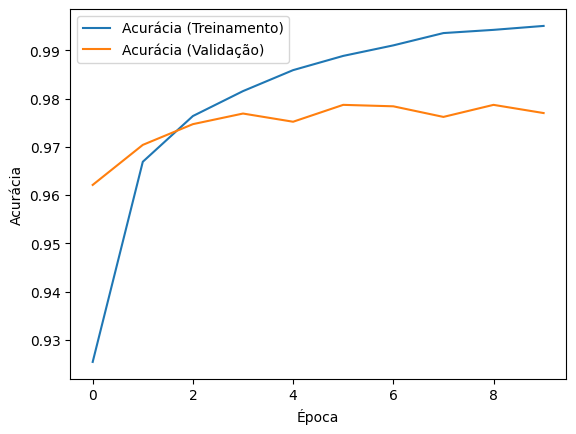

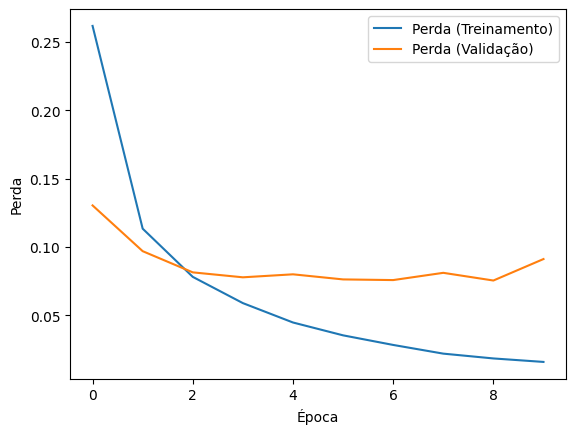

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliza√ß√£o e pr√©-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Constru√ß√£o do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compila√ß√£o do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo with validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

print(history.history.keys()) # Print keys to verify

# Visualiza√ß√£o dos resultados
plt.plot(history.history['accuracy'], label='Acur√°cia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acur√°cia (Valida√ß√£o)')
plt.xlabel('√âpoca')
plt.ylabel('Acur√°cia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Valida√ß√£o)')
plt.xlabel('√âpoca')
plt.ylabel('Perda')
plt.legend()
plt.show()

Este c√≥digo ir√° gerar uma grade 2x5, exibindo os 10 primeiros d√≠gitos do conjunto de treinamento, juntamente com suas respectivas labels.

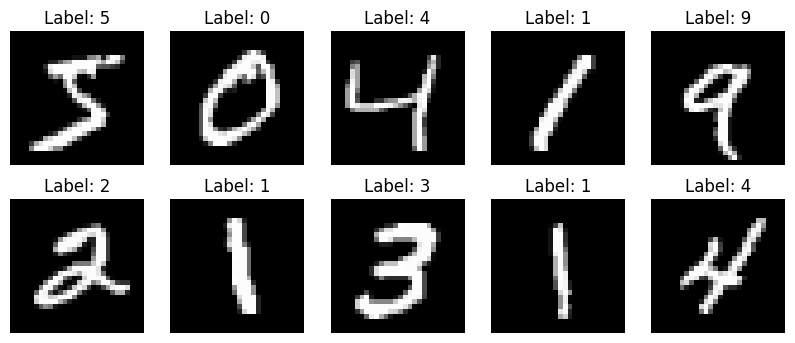

In [ ]:
import matplotlib.pyplot as plt

# Carrega os dados do MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exibe os 10 primeiros d√≠gitos
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

#2.M√©todos de Inicializa√ß√£o de Pesos

Os m√©todos de inicializa√ß√£o de pesos em redes neurais s√£o t√©cnicas utilizadas para definir os valores iniciais dos par√¢metros de uma rede antes do treinamento.

A escolha da inicializa√ß√£o pode impactar diretamente a converg√™ncia do modelo, afetando a estabilidade do gradiente e a velocidade de aprendizado. Inicializa√ß√µes inadequadas podem levar a problemas como gradientes desaparecendo (vanishing gradients) ou gradientes explosivos (exploding gradients), dificultando o treinamento da rede.




## 2.1. Como mitigar esses problemas?
Para mitigar esses problemas, diferentes estrat√©gias foram desenvolvidas, como inicializa√ß√£o aleat√≥ria, Xavier/Glorot, He e at√© inicializa√ß√£o zero (que, apesar de ser um caso extremo, exemplifica a import√¢ncia de um bom m√©todo).

O objetivo principal dessas abordagens √© garantir que os pesos sejam pequenos o suficiente para evitar explos√µes de gradientes, mas suficientemente diversos para que diferentes neur√¥nios aprendam representa√ß√µes distintas dos dados.

## 2.2. Inicializa√ß√£o Aleat√≥ria

A inicializa√ß√£o aleat√≥ria de pesos √© uma das estrat√©gias mais simples utilizadas para definir os valores iniciais dos par√¢metros em redes neurais antes do treinamento. Seu principal objetivo √© evitar a simetria entre os neur√¥nios, garantindo que cada um aprenda diferentes padr√µes dos dados. Se todos os pesos fossem inicializados com zero, os neur√¥nios dentro de uma mesma camada receberiam gradientes id√™nticos, tornando-se redundantes e limitando a capacidade da rede. Para evitar esse problema, os pesos podem ser gerados aleatoriamente a partir de distribui√ß√µes uniformes ou normais (gaussianas). Na distribui√ß√£o uniforme, os pesos s√£o amostrados dentro de um intervalo
[
‚àí
ùëü
,
ùëü
]
, enquanto na distribui√ß√£o normal, os pesos seguem uma distribui√ß√£o gaussiana com m√©dia zero e um desvio padr√£o controlado.


## 2.2.1 Poss√≠veis desvantagens da Inicializa√ß√£o Aleat√≥ria
 No entanto, a inicializa√ß√£o aleat√≥ria pura pode causar problemas como gradientes explosivos (se os valores dos pesos forem muito grandes) ou gradientes desaparecendo (se forem muito pequenos), dificultando o treinamento da rede. Al√©m disso, a escolha inadequada da distribui√ß√£o pode interagir negativamente com fun√ß√µes de ativa√ß√£o como sigmoid e tanh, levando a satura√ß√£o e reduzindo a efici√™ncia da retropropaga√ß√£o. Por conta dessas limita√ß√µes, m√©todos mais avan√ßados, como Xavier/Glorot e He, foram desenvolvidos para ajustar dinamicamente os valores iniciais dos pesos de acordo com a arquitetura da rede, otimizando a propaga√ß√£o dos gradientes e melhorando a estabilidade do treinamento.

## 2.2.2 F√≥rmulas



## Distribui√ß√£o Normal

A inicializa√ß√£o aleat√≥ria de pesos em redes neurais √© essencial para evitar a simetria entre os neur√¥nios e permitir um aprendizado eficaz. Para isso, dois m√©todos comuns de gera√ß√£o de pesos s√£o a distribui√ß√£o uniforme e a distribui√ß√£o normal (gaussiana). Ambas s√£o utilizadas para definir valores iniciais dos pesos antes do treinamento da rede, mas cada uma tem suas caracter√≠sticas espec√≠ficas e aplica√ß√µes ideais.



A inicializa√ß√£o uniforme define os pesos
ùëä dentro de um intervalo [‚àíùëü,ùëü], onde todos os valores dentro desse intervalo t√™m a mesma probabilidade de serem escolhidos. A f√≥rmula geral para a distribui√ß√£o uniforme √©: $ùëä‚àºùëà(‚àíùëü,ùëü)$

Isso significa que os pesos s√£o amostrados de uma distribui√ß√£o uniforme no intervalo definido. A fun√ß√£o densidade de probabilidade (PDF) dessa distribui√ß√£o √© dada por:

$$\
P(W) =
\begin{cases}
\frac{1}{2r}, & \text{se } -r \leq W \leq r \\
0, & \text{caso contr√°rio}
\end{cases}$$

Ou seja, todos os valores dentro do intervalo possuem a mesma probabilidade
$ \frac{1}{2r} $ , garantindo que os pesos sejam distribu√≠dos de maneira uniforme.

O valor de ùëü pode ser determinado empiricamente ou definido com base no n√∫mero de neur√¥nios na camada. Se os pesos forem muito grandes, podem causar exploding gradients; se forem muito pequenos, podem levar a vanishing gradients.

Essa inicializa√ß√£o tem algumas vantagens e desvantagens, como as seguintes:

Vantagem: Simplicidade e controle expl√≠cito sobre o intervalo dos pesos.

Desvantagem: Pode n√£o ser ideal para fun√ß√µes de ativa√ß√£o como sigmoid e tanh, pois n√£o leva em conta a varia√ß√£o do gradiente.



## Distribui√ß√£o Gaussiana



Outra abordagem comum √© inicializar os pesos seguindo uma distribui√ß√£o normal (gaussiana) com m√©dia zero e vari√¢ncia
$ùúé^2$, ou seja:

$ùëä‚àºùëÅ(0,ùúé^2)$

A fun√ß√£o densidade de probabilidade (PDF) para a distribui√ß√£o normal √©:

$$
P(W) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{W^2}{2\sigma^2}}
$$

Isso significa que os pesos estar√£o concentrados em torno da m√©dia 0, com maior probabilidade de assumir valores pr√≥ximos de zero e menos probabilidade de assumir valores extremos.

Escolha de
ùúé
: O desvio padr√£o
ùúé
 precisa ser ajustado para garantir que os gradientes n√£o sejam muito grandes nem muito pequenos.
Existem algumas vantagens desse m√©todo de inicia√ß√£o, e desventagens, descritas a seguir:

Vantagem: Apresenta Vari√¢ncia do Gradiente equilibrada entre as camadas, Melhor compatibilidade com redes profundas e algumas fun√ß√µes de ativa√ß√£o, al√©m de  resolver o problema de Simetria entre Neur√¥nios ao atribuir pesos ligeiramente diferentes para cada neur√¥nio, permitindo que cada um aprenda representa√ß√µes distintas.

Desvantagem: Pode ser sens√≠vel ao valor escolhido para
ùúé
œÉ, exigindo ajuste cuidadoso.

## 2.3 Inicializa√ß√£o Xavier/Glorot



A inicializa√ß√£o Xavier/Glorot foi introduzida por **Xavier Glorot e Yoshua Bengio** em 2010, no artigo *Understanding the difficulty of training deep feedforward neural networks*. Esse m√©todo foi desenvolvido para resolver os problemas de vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), que frequentemente ocorrem em redes neurais profundas.

O objetivo da inicializa√ß√£o Xavier √© manter a vari√¢ncia dos pesos equilibrada ao longo das camadas da rede, garantindo que os gradientes n√£o se tornem muito grandes nem muito pequenos √† medida que propagam durante o treinamento. Essa abordagem permite que a rede aprenda de forma mais est√°vel e eficiente.

Durante o treinamento de uma rede neural, os sinais s√£o propagados para frente (forward pass) e para tr√°s (backpropagation). Em cada camada, os pesos \( W \) e as ativa√ß√µes \( a \) s√£o multiplicados, e as fun√ß√µes de ativa√ß√£o s√£o aplicadas. Se os pesos forem muito grandes, os valores da ativa√ß√£o podem crescer exponencialmente, causando exploding gradients. Se os pesos forem muito pequenos, os gradientes diminuem drasticamente, resultando em vanishing gradients.

O m√©todo Xavier foi projetado para equilibrar a vari√¢ncia dos pesos de entrada e sa√≠da de cada camada, evitando que a escala dos valores aumente ou diminua excessivamente.

---

##  Formula√ß√£o Matem√°tica da Inicializa√ß√£o Xavier

A ideia principal da inicializa√ß√£o Xavier √© definir os pesos de uma camada de forma que a vari√¢ncia das ativa√ß√µes permane√ßa constante em cada camada. Isso significa que o desvio padr√£o dos pesos deve ser ajustado com base no n√∫mero de neur√¥nios da camada.

A inicializa√ß√£o Xavier define os pesos \( W \) de acordo com:

$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

ou, na forma normal (gaussiana):

$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Onde:
- $ n_{\text{in}} $ √© o n√∫mero de neur√¥nios da camada anterior (n√∫mero de entradas para a camada atual).
- A vers√£o **uniforme** sorteia os pesos dentro de um intervalo sim√©trico.
- A vers√£o **gaussiana** (normal) sorteia os pesos com m√©dia 0 e vari√¢ncia  $\frac{1}{n_{\text{in}}} $.

Essas equa√ß√µes garantem que a propaga√ß√£o dos sinais permane√ßa est√°vel ao longo das camadas.

---

##  Como Xavier Equilibra os Gradientes?

A justificativa matem√°tica para essa inicializa√ß√£o vem do desejo de manter a **vari√¢ncia da ativa√ß√£o \( a \)** constante em cada camada. Durante o **forward pass**, queremos evitar que os valores das ativa√ß√µes cres√ßam ou diminuam excessivamente:

$$
\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})
$$

Se a vari√¢ncia de \( W \) for muito grande, os valores da ativa√ß√£o podem crescer a cada camada. Se for muito pequena, os valores da ativa√ß√£o diminuem. Para garantir uma propaga√ß√£o equilibrada, Xavier define a vari√¢ncia dos pesos de modo que a entrada e sa√≠da de cada camada tenham valores pr√≥ximos.

---

##  Vers√µes da Inicializa√ß√£o Xavier

###  Xavier Uniforme
$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

Os pesos s√£o amostrados de uma distribui√ß√£o **uniforme** dentro do intervalo calculado. Essa vers√£o √© mais usada quando a fun√ß√£o de ativa√ß√£o n√£o possui regi√µes de satura√ß√£o severa.

###  Xavier Normal (Gaussiana)
$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Os pesos s√£o amostrados de uma **distribui√ß√£o normal** com m√©dia 0 e vari√¢ncia $ \frac{1}{n_{\text{in}}} $. Essa abordagem pode ser √∫til para fun√ß√µes de ativa√ß√£o que se beneficiam de uma distribui√ß√£o mais concentrada ao redor da m√©dia.

---

## Quando Usar Xavier?

A inicializa√ß√£o Xavier √© ideal para **fun√ß√µes de ativa√ß√£o sim√©tricas**, como:
- **Sigmoid**
- **Tanh**

Essas fun√ß√µes podem sofrer com satura√ß√£o se os pesos iniciais forem muito grandes. A inicializa√ß√£o Xavier ajuda a evitar esse problema, garantindo que as ativa√ß√µes iniciais estejam na faixa apropriada para o aprendizado.

---




## 2.4. Inicializa√ß√£o He

A inicializa√ß√£o He, tamb√©m conhecida como Kaiming Initialization, foi introduzida por Kaiming He e colaboradores em 2015, no artigo Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification. Esse m√©todo foi desenvolvido para otimizar redes neurais profundas que utilizam a fun√ß√£o de ativa√ß√£o ReLU (Rectified Linear Unit) e suas variantes, como Leaky ReLU e Parametric ReLU.

## Objetivo

O objetivo da inicializa√ß√£o He √© ajustar a escala dos pesos de modo que a vari√¢ncia das ativa√ß√µes seja preservada ao longo das camadas, garantindo uma propaga√ß√£o est√°vel dos gradientes. Esse m√©todo ajuda a evitar o problema dos vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), comuns em redes profundas.

Durante o treinamento de uma rede neural, os sinais passam para frente (forward pass) e para tr√°s (backpropagation). Como a fun√ß√£o ReLU anula metade das ativa√ß√µes ao definir ùëì(ùë•)=max‚Å°(0,ùë•), a inicializa√ß√£o He ajusta a vari√¢ncia dos pesos para compensar essa perda de informa√ß√£o.

O m√©todo He foi projetado para garantir que os valores das ativa√ß√µes n√£o diminuam nem aumentem drasticamente conforme passam pelas camadas da rede.

## Formula√ß√£o Matem√°tica da Inicializa√ß√£o He
A ideia central da inicializa√ß√£o He √© definir os pesos de cada camada de forma que a vari√¢ncia da ativa√ß√£o seja mantida durante a propaga√ß√£o da rede. Para isso, o desvio padr√£o dos pesos deve ser ajustado com base no n√∫mero de neur√¥nios da camada de entrada.

A inicializa√ß√£o He define os pesos
ùëä de acordo com:
$$
W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)
$$
ou na vers√£o Gaussiana, que √© :
$$
W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)
$$
Onde:

* $ùëõ_{\text{in}}$ √© o n√∫mero de neur√¥nios da camada anterior (entrada da camada atual).

* A vers√£o uniforme sorteia os pesos dentro de um intervalo sim√©trico.





* A vers√£o gaussiana (normal) sorteia os pesos com m√©dia 0 e vari√¢ncia
$\frac2 {n_{\text{in}}}$

O fator
2 na equa√ß√£o compensa a perda de ativa√ß√£o que ocorre devido √† natureza da fun√ß√£o ReLU.

Essas equa√ß√µes garantem que os gradientes permane√ßam est√°veis ao longo das camadas, permitindo que redes profundas aprendam de forma eficiente.

##Como o He Equilibra os Gradientes?

A justificativa matem√°tica para essa inicializa√ß√£o vem do objetivo de manter a vari√¢ncia da ativa√ß√£o ùëé constante em cada camada. Durante o forward pass, queremos evitar que os valores das ativa√ß√µes cres√ßam ou diminuam excessivamente:


$$\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})$$


No caso da fun√ß√£o ReLU, onde a metade das ativa√ß√µes s√£o zeradas
E[ùëì(ùë•)]=0.5ùë•, a vari√¢ncia das ativa√ß√µes diminui. Para compensar essa redu√ß√£o, a inicializa√ß√£o He ajusta a vari√¢ncia dos pesos para:

$$\text{Var}(W) = \frac{2}{n_{\text{in}}}$$

Isso garante que os sinais n√£o desapare√ßam nem explodam conforme propagam pela rede.

##Vers√µes da Inicializa√ß√£o He

###He Uniforme


$$W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)$$
Os pesos s√£o amostrados de uma distribui√ß√£o uniforme dentro do intervalo definido. Essa vers√£o √© √∫til quando se deseja limitar os pesos dentro de um intervalo fixo.


###He Normal (Gaussiana)


$$W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)$$
Os pesos s√£o amostrados de uma distribui√ß√£o normal com m√©dia 0 e vari√¢ncia $\frac2 {n_{\text{in}}}$ . Essa abordagem √© mais comum, pois distribui√ß√µes gaussianas tendem a representar melhor os pesos iniciais de redes profundas.



##Quando Usar He?

A inicializa√ß√£o He √© ideal para fun√ß√µes de ativa√ß√£o que n√£o s√£o sim√©tricas, como:

* ReLU
* Leaky ReLU
* Parametric ReLU (PReLU)

Essas fun√ß√µes de ativa√ß√£o zeram metade das ativa√ß√µes, tornando a inicializa√ß√£o Xavier menos eficiente. A inicializa√ß√£o He resolve esse problema, garantindo que os gradientes sejam propagados de forma equilibrada.

## 2.5 Inicializa√ß√£o Zero

A inicializa√ß√£o Zero √© uma t√©cnica onde todos os pesos da rede neural s√£o inicializados com o valor zero. Embora essa abordagem possa parecer razo√°vel, na maioria dos casos, ela n√£o √© recomendada devido ao problema de redes degeneradas, onde todos os neur√¥nios de uma camada aprendem exatamente os mesmos pesos, tornando a rede ineficaz.



##Poss√≠veis Usos
No entanto, existem alguns casos espec√≠ficos onde a inicializa√ß√£o zero pode ser usada de maneira controlada, principalmente em camadas espec√≠ficas de algumas arquiteturas avan√ßadas

##Problema da Simetria dos neur√¥nios
Em redes neurais, os pesos s√£o atualizados durante o backpropagation, e cada neur√¥nio deve aprender representa√ß√µes distintas dos dados. Se todos os pesos forem inicializados com zero, todos os neur√¥nios de uma mesma camada:

* Receber√£o os mesmos gradientes durante a retropropaga√ß√£o.
* Ser√£o atualizados de maneira id√™ntica.
* Aprender√£o os mesmos padr√µes, tornando-se redundantes.

A rede se comportar√° como um modelo linear, perdendo sua capacidade de aprendizado profundo.

Isso significa que a rede n√£o conseguir√° aprender representa√ß√µes complexas, pois todos os neur√¥nios da mesma camada se tornar√£o equivalentes.

###Exemplo Matem√°tico
Se a sa√≠da de uma camada totalmente conectada for dada por:

$$ùëç=ùëäùëã+ùëè$$
Onde:

ùëä √© a matriz de pesos,
ùëã √© a entrada da camada,
ùëè √© o bias.

Se todos os pesos
ùëä forem zero, ent√£o a sa√≠da da camada ser√°:

$$ùëç=0ùëã+ùëè=ùëè$$

Ou seja, a √∫nica coisa que pode mudar o aprendizado √© o bias, tornando a rede quase ineficaz, pois os pesos n√£o ter√£o influ√™ncia na sa√≠da.



##Usos da Inicializa√ß√£o  Zero
Apesar dos problemas mencionados, a inicializa√ß√£o zero pode ser utilizada em casos espec√≠ficos, como:

* Inicializa√ß√£o de Biases

Em muitas redes neurais, os pesos s√£o inicializados aleatoriamente, mas os bias podem ser inicializados como zero sem causar problemas.
Isso ocorre porque o bias adiciona um deslocamento fixo na ativa√ß√£o do neur√¥nio e n√£o sofre com o problema da simetria dos pesos.

* Algumas Camadas Espec√≠ficas em Redes Convolucionais (CNNs)

Em arquiteturas profundas de CNNs, a inicializa√ß√£o zero pode ser usada nas camadas finais para estabilizar a rede no in√≠cio do treinamento.
Algumas t√©cnicas avan√ßadas de regulariza√ß√£o podem mitigar os efeitos negativos.
* Modelos Pr√©-Treinados

Em redes neurais que j√° foram pr√©-treinadas, algumas camadas podem ser inicializadas com zero ao realizar fine-tuning, desde que os pesos da maioria das camadas tenham sido previamente aprendidos.

## 2.6 Compara√ß√£o Com Experimento

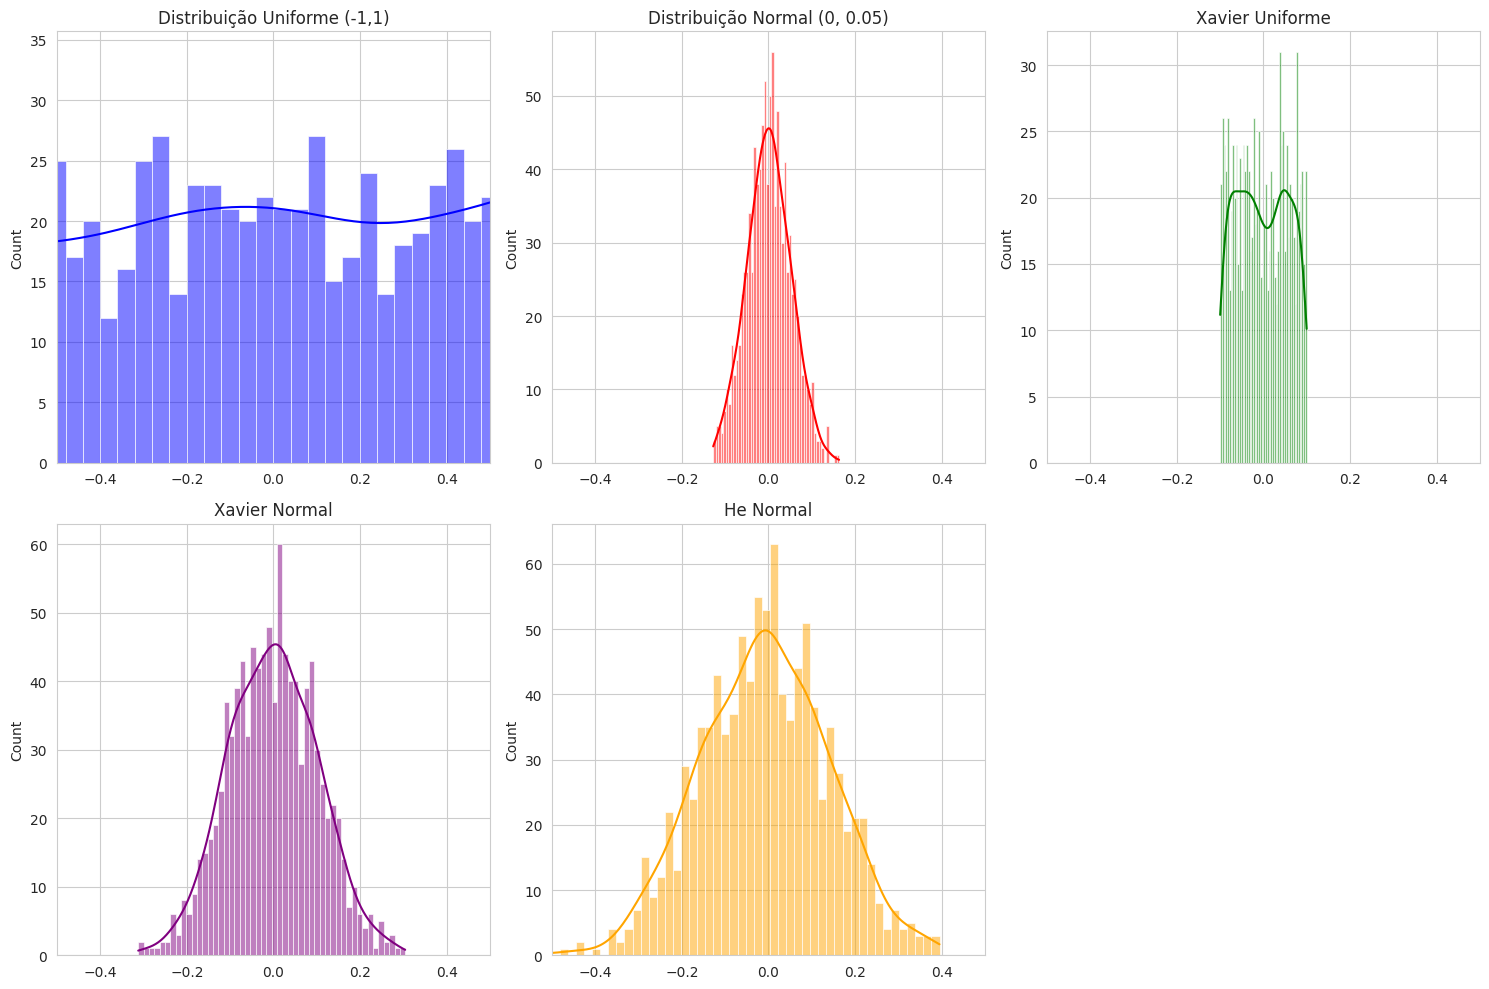

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook
from bokeh.models import Select
from bokeh.layouts import column



# Configura√ß√£o do estilo dos gr√°ficos
sns.set_style("whitegrid")

# Defini√ß√£o dos par√¢metros
num_pesos = 1000  # Quantidade de pesos a serem gerados
n_in = 100  # N√∫mero de neur√¥nios na camada de entrada
limite_x = (-0.5, 0.5)  # Limite fixo para todos os gr√°ficos

# Inicializa√ß√£o dos Pesos
pesos_uniform = np.random.uniform(-1, 1, num_pesos)
pesos_normal = np.random.normal(0, 0.05, num_pesos)
limite_xavier = 1 / np.sqrt(n_in)
pesos_xavier = np.random.uniform(-limite_xavier, limite_xavier, num_pesos)
pesos_xavier_normal = np.random.normal(0, 1 / np.sqrt(n_in), num_pesos)
pesos_he = np.random.normal(0, np.sqrt(2 / n_in), num_pesos)

# Criando Gr√°ficos com Matplotlib para Visualizar as Distribui√ß√µes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Fun√ß√£o para padronizar os gr√°ficos
def plot_hist(ax, data, title, color):
    sns.histplot(data, bins=50, kde=True, ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlim(limite_x)  # Definir limite fixo para o eixo X

# Criando os subgr√°ficos
plot_hist(axes[0, 0], pesos_uniform, "Distribui√ß√£o Uniforme (-1,1)", "blue")
plot_hist(axes[0, 1], pesos_normal, "Distribui√ß√£o Normal (0, 0.05)", "red")
plot_hist(axes[0, 2], pesos_xavier, "Xavier Uniforme", "green")
plot_hist(axes[1, 0], pesos_xavier_normal, "Xavier Normal", "purple")
plot_hist(axes[1, 1], pesos_he, "He Normal", "orange")

# Remover eixo extra
axes[1, 2].axis('off')

# Ajuste da disposi√ß√£o dos gr√°ficos
plt.tight_layout()
plt.show()

# Criando Gr√°fico Interativo com Bokeh
output_notebook()

# Criando um histograma para cada distribui√ß√£o
hist_uniform, edges_uniform = np.histogram(pesos_uniform, bins=50, range=limite_x)
hist_normal, edges_normal = np.histogram(pesos_normal, bins=50, range=limite_x)
hist_xavier, edges_xavier = np.histogram(pesos_xavier, bins=50, range=limite_x)
hist_xavier_normal, edges_xavier_normal = np.histogram(pesos_xavier_normal, bins=50, range=limite_x)
hist_he, edges_he = np.histogram(pesos_he, bins=50, range=limite_x)

# Criando a figura
p = figure(title="Compara√ß√£o das Inicializa√ß√µes de Pesos",
           x_axis_label="Valor dos Pesos", y_axis_label="Frequ√™ncia",
           width=800, height=500)

# Adicionando os histogramas em camadas para compara√ß√£o
p.quad(top=hist_uniform, bottom=0, left=edges_uniform[:-1], right=edges_uniform[1:],
       fill_alpha=0.3, color="blue", legend_label="Uniforme (-1,1)")

p.quad(top=hist_normal, bottom=0, left=edges_normal[:-1], right=edges_normal[1:],
       fill_alpha=0.3, color="red", legend_label="Normal (0, 0.05)")

p.quad(top=hist_xavier, bottom=0, left=edges_xavier[:-1], right=edges_xavier[1:],
       fill_alpha=0.3, color="green", legend_label="Xavier Uniforme")

p.quad(top=hist_xavier_normal, bottom=0, left=edges_xavier_normal[:-1], right=edges_xavier_normal[1:],
       fill_alpha=0.3, color="purple", legend_label="Xavier Normal")

p.quad(top=hist_he, bottom=0, left=edges_he[:-1], right=edges_he[1:],
       fill_alpha=0.3, color="orange", legend_label="He Normal")

# Configura√ß√µes do gr√°fico interativo
p.legend.location = "top_right"
p.add_tools(HoverTool())


# Exibir gr√°fico no Jupyter Notebook
show(p, notebook_handle=True)




#3.Impacto da Inicializa√ß√£o de Pesos



A inicializa√ß√£o de pesos desempenha um papel fundamental no desempenho das redes neurais, influenciando diretamente a converg√™ncia do modelo, a estabilidade do treinamento e a qualidade do aprendizado. Uma inicializa√ß√£o inadequada pode levar a problemas como exploding gradients (gradientes explodindo) e vanishing gradients (gradientes desaparecendo), dificultando o aprendizado da rede e comprometendo sua efici√™ncia.

## 3.1 Import√¢ncia da inicializa√ß√£o de pesos


A inicializa√ß√£o dos pesos √© um dos fatores mais cr√≠ticos para o sucesso do treinamento de uma rede neural. Uma boa inicializa√ß√£o permite que a rede aprenda de maneira eficiente, enquanto uma m√° inicializa√ß√£o pode dificultar ou at√© impedir o aprendizado. Os principais motivos pelos quais a inicializa√ß√£o de pesos √© importante incluem:

###Preven√ß√£o de Vanishing e Exploding Gradients
Se os pesos iniciais forem muito pequenos, os gradientes podem diminuir exponencialmente ao longo das camadas, resultando em vanishing gradients, onde a rede n√£o consegue atualizar seus pesos corretamente. Por outro lado, se os pesos forem muito grandes, os gradientes podem explodir, tornando o treinamento inst√°vel.

###Acelera√ß√£o da Converg√™ncia
Uma inicializa√ß√£o bem escolhida ajuda a rede a convergir mais rapidamente para um √≥timo local da fun√ß√£o de perda. Isso reduz a necessidade de ajustes manuais na taxa de aprendizado e evita longos tempos de treinamento.

### Evita Redes Degeneradas
Como visto na Inicializa√ß√£o Zero, se os pesos forem inicializados incorretamente, todos os neur√¥nios de uma mesma camada podem aprender os mesmos valores, resultando em uma rede neural redundante, que se comporta como um modelo linear e perde sua capacidade de aprendizado.

###Compatibilidade com Fun√ß√µes de Ativa√ß√£o

Diferentes fun√ß√µes de ativa√ß√£o possuem comportamentos distintos. M√©todos como Xavier s√£o ideais para sigmoid e tanh, pois mant√™m a vari√¢ncia dos gradientes equilibrada, enquanto He Initialization √© mais adequada para ReLU e suas variantes, compensando a perda de ativa√ß√£o

###Melhor Generaliza√ß√£o
Uma inicializa√ß√£o adequada ajuda a rede a aprender representa√ß√µes mais diversas e generaliz√°veis, evitando que o modelo fique preso em m√≠nimos locais ruins ou que aprenda padr√µes irrelevantes dos dados.



## 3.2 Problemas causados por inicializa√ß√£o inadequada:


A escolha incorreta da inicializa√ß√£o de pesos pode afetar significativamente o desempenho da rede neural, resultando em dificuldades de converg√™ncia, treinamento inst√°vel e baixa capacidade de aprendizado. Os principais problemas que surgem devido a uma inicializa√ß√£o inadequada s√£o:

* Vanishing Gradients (Gradientes Desaparecendo)
* Exploding Gradients (Gradientes Explodindo)
* Redes Degeneradas (Neur√¥nios Redundantes)
* Converg√™ncia Lenta ou Treinamento Ineficiente

###Gradientes explosivos (exploding gradients)


O problema de exploding gradients ocorre quando os gradientes se tornam muito grandes, fazendo com que os pesos da rede aumentem exponencialmente, tornando o treinamento inst√°vel.

* Causa:

Inicializar pesos muito grandes leva a ativa√ß√µes muito altas, resultando em gradientes que crescem exponencialmente na retropropaga√ß√£o.
Pode ocorrer em redes muito profundas, onde pequenos erros se acumulam camada ap√≥s camada.

* Consequ√™ncia:

O treinamento se torna inst√°vel e a fun√ß√£o de perda pode oscilar violentamente.
A rede pode divergir, resultando em pesos extremamente altos ou NaN (n√£o num√©ricos).

* Como Evitar?

Usar inicializa√ß√µes como He (Kaiming Initialization), que ajusta os pesos para redes com ReLU. Al√©m disso, pode-se aplicar Gradient Clipping, limitando o valor m√°ximo dos gradientes ou utilizar Batch Normalization para manter os valores dentro de uma faixa segura.

###Gradientes desaparecendo (vanishing gradients)

Esse problema ocorre quando os gradientes se tornam extremamente pequenos durante a backpropagation, reduzindo a capacidade da rede de atualizar seus pesos e aprender padr√µes complexos.

* Causa

Inicializar pesos muito pequenos faz com que os gradientes diminuam rapidamente √† medida que s√£o propagados para tr√°s nas camadas da rede.
Ocorre principalmente em redes profundas que utilizam fun√ß√µes de ativa√ß√£o sigmoid ou tanh, pois essas fun√ß√µes t√™m regi√µes onde os gradientes s√£o quase zero.
* Consequ√™ncia

A rede aprende muito devagar ou para completamente de aprender.
Camadas iniciais da rede ficam in√∫teis, pois os gradientes que chegam at√© elas s√£o praticamente zero.

* Como Evitar?

Usar inicializa√ß√µes como Xavier/Glorot (mant√©m a vari√¢ncia dos gradientes equilibrada),
Utilizar ReLU ao inv√©s de sigmoid/tanh, pois a ReLU reduz a chance de satura√ß√£o,
ou Aplicar Batch Normalization, que ajuda a estabilizar os gradientes.



### Converg√™ncia Lenta ou Treinamento Ineficiente

Se a inicializa√ß√£o n√£o for apropriada, a rede pode demorar muito para aprender, mesmo que os gradientes n√£o desapare√ßam nem explodam.

* Causa

Inicializar pesos com vari√¢ncias mal escolhidas pode fazer com que os valores de ativa√ß√£o demorem a entrar na faixa de aprendizado ideal.
Ademais, uma inicializa√ß√£o muito conservadora (com pesos pequenos demais) pode resultar em passos de atualiza√ß√£o muito pequenos durante o treinamento.

* Consequ√™ncia

A rede pode precisar de muitas √©pocas para aprender um padr√£o simples.
O modelo pode precisar de taxas de aprendizado muito altas, o que pode gerar instabilidade.

* Como Evitar?

 Usar inicializa√ß√µes apropriadas como He (para ReLU) ou Xavier (para Sigmoid/Tanh). Al√©m disso, pode-se ajustar a taxa de aprendizado junto com a inicializa√ß√£o dos pesos e utilizar schedulers de taxa de aprendizado, como StepLR ou CosineAnnealing.

## 3.3 Testes pr√°ticos comparando os m√©todos de inicializa√ß√£o

Esse c√≥digo implementa um experimento comparando diferentes m√©todos de inicializa√ß√£o de pesos em uma rede neural MLP treinada no dataset MNIST. O objetivo √© avaliar como a inicializa√ß√£o afeta a converg√™ncia e o desempenho da rede.

Ademais, no c√≥digo abaixo, a Inicializa√ß√£o Aleat√≥ria foi descrita como "default".


Treinando com default...

Inicializa√ß√£o: default | √âpoca [1/10], Loss: 1.4731
Inicializa√ß√£o: default | √âpoca [2/10], Loss: 0.5148
Inicializa√ß√£o: default | √âpoca [3/10], Loss: 0.3916
Inicializa√ß√£o: default | √âpoca [4/10], Loss: 0.3488
Inicializa√ß√£o: default | √âpoca [5/10], Loss: 0.3235
Inicializa√ß√£o: default | √âpoca [6/10], Loss: 0.3048
Inicializa√ß√£o: default | √âpoca [7/10], Loss: 0.2892
Inicializa√ß√£o: default | √âpoca [8/10], Loss: 0.2755
Inicializa√ß√£o: default | √âpoca [9/10], Loss: 0.2633
Inicializa√ß√£o: default | √âpoca [10/10], Loss: 0.2517

Treinando com xavier...

Inicializa√ß√£o: xavier | √âpoca [1/10], Loss: 0.6798
Inicializa√ß√£o: xavier | √âpoca [2/10], Loss: 0.3487
Inicializa√ß√£o: xavier | √âpoca [3/10], Loss: 0.3002
Inicializa√ß√£o: xavier | √âpoca [4/10], Loss: 0.2712
Inicializa√ß√£o: xavier | √âpoca [5/10], Loss: 0.2483
Inicializa√ß√£o: xavier | √âpoca [6/10], Loss: 0.2309
Inicializa√ß√£o: xavier | √âpoca [7/10], Loss: 0.2154
Inicializa√ß√£o: x

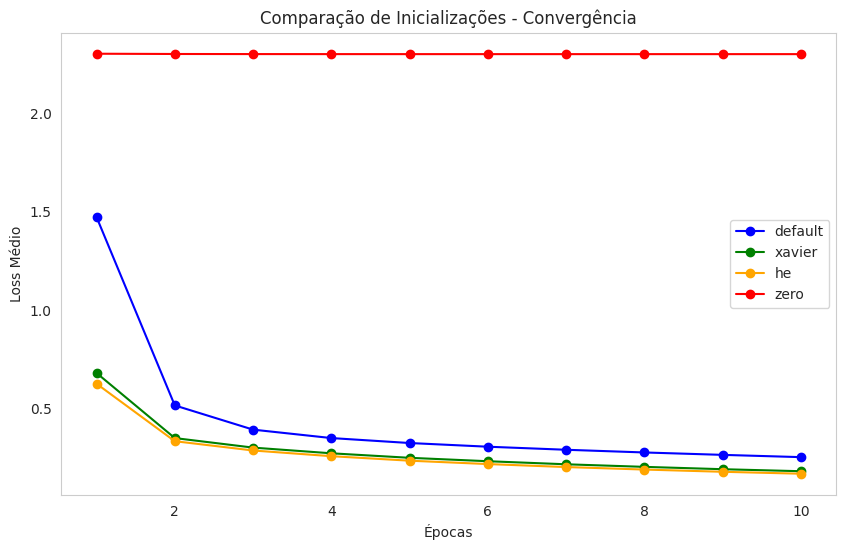

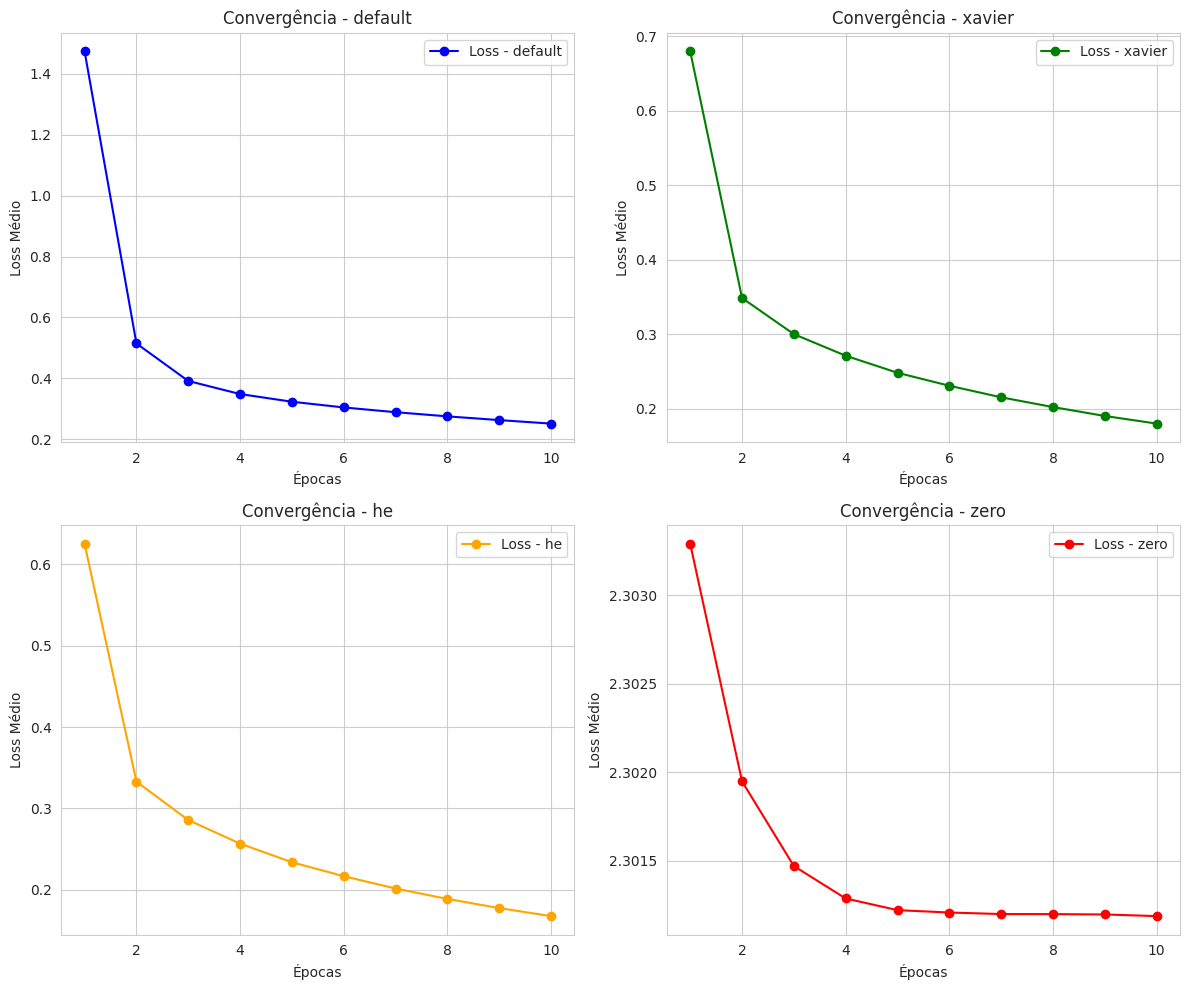

In [ ]:
# Reimportando as bibliotecas necess√°rias ap√≥s o reset do estado
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Defini√ß√£o dos hiperpar√¢metros
batch_size = 128
learning_rate = 0.01
epochs = 10
seed_value = 42  # Valor da semente

# Transforma√ß√£o e carregamento do dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Defini√ß√£o da rede neural
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Aplica√ß√£o das inicializa√ß√µes
def init_weights(model, init_method):
    if init_method == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
        nn.init.xavier_uniform_(model.fc3.weight)
    elif init_method == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc3.weight, nonlinearity='relu')
    elif init_method == "zero":
        nn.init.zeros_(model.fc1.weight)
        nn.init.zeros_(model.fc2.weight)
        nn.init.zeros_(model.fc3.weight)

# Fun√ß√£o para treinar a rede neural
def train_model(init_method):
    set_seed(seed_value)  # Garante que cada modelo inicie com a mesma semente
    model = MLP()
    init_weights(model, init_method)  # Aplica a inicializa√ß√£o selecionada

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Inicializa√ß√£o: {init_method} | √âpoca [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Teste das diferentes inicializa√ß√µes
methods = ["default", "xavier", "he", "zero"]
loss_results = {}

for method in methods:
    print(f"\nTreinando com {method}...\n")
    loss_results[method] = train_model(method)

# Definindo cores diferentes para cada inicializa√ß√£o
colors = {
    "default": "blue",
    "xavier": "green",
    "he": "orange",
    "zero": "red"
}

# Gr√°fico √önico Comparando Todas as Inicializa√ß√µes
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("√âpocas")
plt.ylabel("Loss M√©dio")
plt.title("Compara√ß√£o de Inicializa√ß√µes - Converg√™ncia")
plt.legend()
plt.grid()
plt.show()

# Criando Subplots Individuais para Cada Inicializa√ß√£o
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid para at√© 4 inicializa√ß√µes

methods_list = list(loss_results.keys())  # Lista com os nomes das inicializa√ß√µes

# Mapeando cada inicializa√ß√£o para um gr√°fico separado
for i, method in enumerate(methods_list):
    row, col = divmod(i, 2)  # Define a posi√ß√£o no subplot
    axes[row, col].plot(range(1, epochs+1), loss_results[method], marker='o', linestyle='-', label=f"Loss - {method}", color=colors.get(method, "black"))
    axes[row, col].set_xlabel("√âpocas")
    axes[row, col].set_ylabel("Loss M√©dio")
    axes[row, col].set_title(f"Converg√™ncia - {method}")
    axes[row, col].legend()
    axes[row, col].grid(True)

# Removendo plots vazios (caso haja menos de 4 inicializa√ß√µes)
if len(methods_list) < 4:
    for i in range(len(methods_list), 4):
        fig.delaxes(axes.flatten()[i])

# Ajuste para melhor visualiza√ß√£o
plt.tight_layout()
plt.show()



## 3.4 Gr√°ficos de converg√™ncia e impacto na performance

Para comparar o impacto da performace de cada inicializa√ß√£o, podemos reimpimir o gr√°fico comparativo abaixo

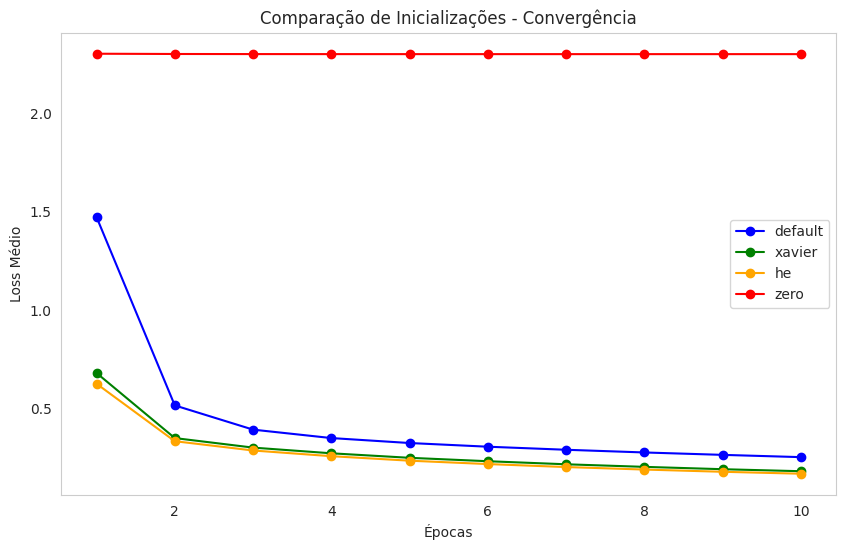

In [ ]:
# Reimprimir o gr√°fico de converg√™ncia das inicializa√ß√µes
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("√âpocas")
plt.ylabel("Loss M√©dio")
plt.title("Compara√ß√£o de Inicializa√ß√µes - Converg√™ncia")
plt.legend()
plt.grid()
plt.show()

O gr√°fico de converg√™ncia ilustra como diferentes m√©todos de inicializa√ß√£o afetam o desempenho do treinamento e a estabilidade da rede neural. A inicializa√ß√£o dos pesos influencia a rapidez com que a loss diminui, a estabilidade do aprendizado e a capacidade da rede de generalizar para novos dados. Vamos analisar cada inicializa√ß√£o separadamente com base nos resultados observados.

###He Initialization (Amarelo) üü°
 Melhor desempenho e converg√™ncia mais r√°pida. Projetada para ReLU, evitando o problema de vanishing gradients. Mant√©m a vari√¢ncia dos gradientes equilibrada em redes profundas.
* Consequ√™ncia:

Permite um treinamento mais eficiente e est√°vel.
Evita que os gradientes desapare√ßam ou explodam.
Ideal para redes neurais profundas com ReLU ou variantes (Leaky ReLU, PReLU).
### Xavier Initialization (Verde) üü¢
Desempenho bom, mas ligeiramente inferior ao He.
Criada para fun√ß√µes sigmoid e tanh, mantendo os gradientes equilibrados.
Garante que as ativa√ß√µes n√£o fiquem muito altas nem muito baixas.
* Consequ√™ncia:

Funciona bem para fun√ß√µes sigmoides, mas pode n√£o ser ideal para ReLU.
Converg√™ncia um pouco mais lenta do que He, mas ainda eficaz.
Melhor escolha para redes n√£o t√£o profundas.
### Padr√£o do PyTorch (Azul) üîµ
M√©todo utilizado por padr√£o no torch.nn.Linear().
Pode variar dependendo da arquitetura, mas geralmente usa uma distribui√ß√£o normal aleat√≥ria padr√£o.
* Consequ√™ncia:

Pode n√£o ser a inicializa√ß√£o mais otimizada para redes profundas.
Converg√™ncia um pouco mais lenta do que Xavier e He.
Ainda funciona, mas pode exigir mais ajustes de hiperpar√¢metros.

### Inicializa√ß√£o Zero (Vermelho) üî¥
Pior desempenho, pois a rede n√£o aprende!
Causa que todos os neur√¥nios aprendem os mesmos pesos, levando √† degenera√ß√£o da rede.
* Consequ√™ncia:

Os gradientes s√£o iguais para todos os neur√¥nios, impedindo a aprendizagem.
A rede se comporta como um modelo linear, sem capacidade de representar padr√µes complexos.
Nunca deve ser usada para inicializar pesos, apenas biases!


# 4. Otimizadores

Otimizadores s√£o m√©todos utilizados para ajustar os par√¢metros de uma rede neural durante seu treinamento, de modo a **minimizar o valor da fun√ß√£o de perda** com mais efic√°cia e idealmente atingir um m√≠nimo global. Os  otimizadores abordados nessa se√ß√£o ser√£o:

1. **SGD (Stochastic Gradient Descent)**
2. **SGD + Momentum**
3. **Nesterov**
4. **AdaGrad**
5. **RMSprop**
6. **Adam**

## 4.1 SGD (Stochastic Gradient Descent)

O SGD, ou Descida do Gradiente Estoc√°stico, √© um dos mais simples algoritmos de otimiza√ß√£o utilizados. Como o pr√≥prio nome sugere, ele usa o **Gradiente** da fun√ß√£o de perda para "descer-la", sempre tentando atingir um valor menor do que o anterior. A atualiza√ß√£o de par√¢metros √© feita com a seguinte f√≥rmula:

$$ùëä_{t+1} = ùëä_{t} ‚àí ùúÇ ‚ãÖ ‚àáùêø(ùëä_{t})$$

Onde:

- **$ùëä_{t}$** representa os par√¢metros da rede na itera√ß√£o ùë°.

- **$ùúÇ$** √© a taxa de aprendizado, um hiperpar√¢metro que controla o tamanho do passo na dire√ß√£o do gradiente.

- **$‚àáùêø(ùëä_{t})$** √© o gradiente da fun√ß√£o de perda ùêø em rela√ß√£o aos pesos.

Essa atualiza√ß√£o √© feita em cada itera√ß√£o para cada um das amostras da rede. Isso pode ser um problema para um n√∫mero grande de amostras, visto que fazer o c√°lculo do gradiente se tornaria muito custoso, tanto em rela√ß√£o ao tempo necess√°rio para executar a opera√ß√£o quanto ao **custo computacional**. Al√©m disso, a converg√™ncia desse m√©todo o pode ser muito lenta, visto que cada amostra influencia diretamente na altera√ß√£o dos par√¢metros.

### **Impacto de diferentes inicializa√ß√µes**

O SGD √© altamente sens√≠vel √† inicializa√ß√£o. Se os pesos forem muito pequenos, os gradientes tamb√©m ser√£o pequenos, levando a uma converg√™ncia muito lenta (vanishing gradients). Se forem muito grandes, os gradientes podem crescer rapidamente, tornando o treinamento inst√°vel (exploding gradients).

- He Initialization √© recomendada para redes com ReLU, pois mant√©m os gradientes equilibrados, enquanto Xavier Initialization √© uma boa escolha para redes com sigmoid ou tanh, garantindo que os gradientes n√£o desapare√ßam.

- Inicializa√ß√£o Zero n√£o funciona com SGD, pois todos os neur√¥nios aprenderiam os mesmos pesos, resultando em uma rede degenerada.

## 4.2 M√©todos baseados em Momento

Os m√©odos baseados em momento buscam **acelerar a converg√™ncia** de algoritmos de descida de gradiente, tratando problemas como a oscila√ß√µes nas atualiza√ß√µes de par√¢metros, travamento em m√≠nimos locais, e a demora na converg√™ncia. Como exemplos ser√£o abordados o **SGD + Momentum** e o **Nesterov**

### 4.2.1 SGD + Momentum

Esse algoritmo introduz termo de **"velocidade"** ao c√°lculo de atualiza√ß√£o de pesosdo SGD comum. Esse termo √© baseado nos gradientes das **itera√ß√µes passadas**, permitindo que o algoritmo "lembre" da dire√ß√£o que estava tomando.

$$ùëä_{t+1} = ùëä_{t} + v_{t+1}$$

Esse termo √© dado por

$$ v_{t+1} = \rho v_{t} ‚àí ùúÇ ‚ãÖ ‚àáùêø(ùëä_{t})$$

Ent√£o a equa√ß√£o geral fica assim:
$$ùëä_{t+1} = ùëä_{t} + \rho v_{t} ‚àí ùúÇ ‚ãÖ ‚àáùêø(ùëä_{t})$$
Onde:


- **$v_{t}$** √© a velocidade

- **$\rho$** √© o momento, um hiperpar√¢metro que controla o quanto do gradiente passado √© mantido.

Esse m√©todo **reduz as osclia√ß√µes** entre atualiza√ß√µes de par√¢metros e funciona bem em superf√≠cies com vales estreitos, **acelerando a converg√™ncia**. No entanto, ele tamb√©m est√° suscet√≠vel a **overshooting**, ou seja, a passar do m√≠nimo global.

### **Impacto de diferentes inicializa√ß√µes**

Se os pesos forem inicializados muito grandes, o momentum pode acelerar a rede na dire√ß√£o errada, dificultando a converg√™ncia.
Se forem muito pequenos, o momentum pode n√£o ter um impacto significativo.

- Inicializa√ß√µes equilibradas, como Xavier e He, garantem que o momentum funcione corretamente, mantendo o treinamento est√°vel.

### 4.2.2 Nesterov

√â uma varia√ß√£o do SGD + Momentum, que ao inv√©s de calcular o gradiente  nos valores atuais dos par√¢metros, ele calcula o **gradiente na posi√ß√£o futura** prevista dos par√¢metros, levando a atualiza√ß√µes mais informadas e potencialmente mais eficazes.

$$ùëä_{t+1} = ùëä_{t} + \rho v_{t} ‚àí ùúÇ ‚ãÖ ‚àáùêø(ùëä_{t} + \rho v_{t})$$

Essa adi√ß√£o permite mitigar as desvantagens do SGD com momento, principalmente na presen√ßa de alta curvatura ou gradientes ruidosos, resultando numa maior estabilidade com **menos oscila√ß√µes** e menor chance de overshooting, **acelerando a converg√™ncia** ainda mais, mas isso vem com um **custo computacional maior**.

### **Impacto de diferentes inicializa√ß√µes**

- Inicializar os pesos com 0 resulta no mesmo problema de simetria do SGD e SGD com momento.

- Inicializa√ß√µes aleat√≥rias com pesos muito grandes ou muito pequenos podem gerar oscila√ßoes e prejudicar a converg√™ncia

- Glorot/Xavier funciona bem para fun√ß√µes de ativa√ß√£o sigmoide/tahn, mas pode ter dificuldades com ReLU devido a gradientes morrendo.

- He funciona bem com ReLU, mantendo gradientes ativos e acelerando o aprendizado de modo est√°vel


## 4.3 M√©todos Adaptativos

Diferentemente dos outros m√©todos abordados, os m√©todos adaptativos se destacam por **ajustarem automaticamente e dinamicamente a taxa de aprendizado** durante o treinamento. Isso significa que pesos diferentes podem ter taxas de atualiza√ß√£o diferentes, o que pode acelerar a converg√™ncia e melhorar a estabilidade.

### 4.3.1 AdaGrad (Adapative Gradient)

O AdaGrad pega esse conceito e aplica ao SGD, ajustando a taxa de aprendizado para cada par√¢metro individualmente. Isso √© feito pela introdu√ß√£o do fator $G_{t}$

$$G_{t + 1} = G_{t} + ‚àáùêø(ùëä_{t})^2$$


$$ùëä_{t+1} = ùëä_{t} ‚àí \frac{ùúÇ}{\sqrt{G_{t}} + \varepsilon} ‚ãÖ ‚àáùêø(ùëä_{t})$$

Onde:
- $G_{t}$ √© a soma dos gradientes ao quadrado
- $\varepsilon$ √© um estabilizador n√∫merico, usado para evitar a divis√£o por 0

A ideia √© que se o gradiente de um par√¢metro mudou drasticamente, ele deve ter feito progresso em dire√ß√£o ao m√≠nimo desejado, ent√£o sua taxa de aprendizado √© reduzida proporcionalmente. Se o gradiente muda pouco, foi feito pouco progresso e a taxa de aprendizado √© pouco reduzida. Isso permite que o algoritmo aprenda mais em uma dire√ß√£o do que outras, sendo favor√°vel para certos tipos de surpef√≠cie de fun√ß√£o de perda. Apesar disso, a taxa de aprendizado n√£o √© capaz de aumentar e **sempre diminui**, o que pode desacelerar a converg√™ncia, mesmo quando a trajet√≥ria ideal √© clara.

### **Impacto de diferentes inicializa√ß√µes**

- Inicializa√ß√µes extremas e com 0 afetam fortemente o acumulo de gradientes ao longo do tempo, gerando instabilidade.

- A inicializa√ß√£o Xavier/Glorot pode funcionar bem, mas corre o risco da taxa de aprendizado ser reduzida muito cedo

- He Pode ter gradientes muito grandes no in√≠cio, reduzindo a efic√°cia do AdaGrad



### 4.3.2 RMSprop (Root Mean Squared Propagation)

Para evitar o problema de gradiente sempre crescentes do Adagrad, o RMSprop introduziu um termo hiperpar√¢metro $\beta$ para determinar o quanto dos gradientes passados seria levado em conta nos c√°lculos seguintes

$$G_{t + 1} = \beta G_{t} + (1 - \beta)‚àáùêø(ùëä_{t})^2$$

$$ùëä_{t+1} = ùëä_{t} ‚àí \frac{ùúÇ}{\sqrt{G_{t}} + \varepsilon} ‚ãÖ ‚àáùêø(ùëä_{t})$$

Onde $\beta$ √© um hiperpar√¢metro de suaviza√ß√£o sendo que  $0<\beta \leq 1$

Essa mudan√ßa retira o problema do Adagrad e √© √∫til para problemas n√£o estacion√°rios, como redes recorrentes, e se adapta a diferentes gradientes. Apesar disso, o ajuste err√¥neo de  $\beta$ pode levar a atualiza√ß√µes inst√°veis

### **Impacto de diferentes inicializa√ß√µes**

- Menos afetado por inicializa√ß√µes extremas n√£o afetam tanto o RMSprop, pois ele adapta automaticamente a taxa de aprendizado.

- Inicializa√ß√µes com 0 fazem com que n√£o haja aprendizado

- Inicializa√ß√µes bem equilibradas como Xavier ou He s√£o ben√©ficas.

### 4.3.3 Adam (Adaptative Momentum)

O m√©todo Adam junta a **atualiza√ß√£o de taxa de erro** dos m√©todos adaptativos com a ideia de **momento**.


$$m_{t+1} = \beta_{1} m_{t} ‚àí (1 - \beta_{1}) ‚ãÖ ‚àáùêø(ùëä_{t}),    \hat m_{t+1} = \frac{m_{t+1}}{1-\beta_{1}^2}$$

$$G_{t + 1} = \beta_{2} G_{t} + (1 - \beta_{2})‚àáùêø(ùëä_{t})^2,   \hat G_{t+1} = \frac{G_{t+1}}{1-\beta_{2}^2}$$


$$ùëä_{t+1} = ùëä_{t} ‚àí \frac{ùúÇ}{\sqrt{\hat G_{t}} + \varepsilon} ‚ãÖ\hat m_{t+1}$$



Onde:
- $m_{t}$ √© a m√©dia m√≥vel dos gradientes (similar ao momentum)
- $G_{t}$ √© a m√©dia m√≥vel dos quadrados dos gradientes (similar ao RMSprop)
- $\beta_{1}$ e $\beta_{2}$ s√£o hiperpar√¢metros (com valores t√≠picos de 0,9 e 0,999, respectivamente).
- $\hat m_{t+1}$ e $\hat G_{t+1}$ s√£o as vers√µes corrigidas de $m_{t}$ e $G_{t}$, respectivamente, ajustadas para remover vi√©s inicial

O uso de momento e taxas de aprendizado adaptativas ajuda a rede a convergir mais rapidamente e de forma mais est√°vel, evitando grandes oscila√ß√µes ou uma converg√™ncia muito lenta. O Adam funciona bem mesmo com grandes volumes de dados ou quando a fun√ß√£o de perda √© muito ruidosa. Por esses motivos, esse algoritmo √© um dos mais utilizados atualmente. Apesar disso, o Adam ainda √© sens√≠vel aos seus hiperpar√¢metros, e pela sua natureza adaptativa, o Adam pode acabar fazendo sobreajustes em alguns se n√£o for controlado.

### **Impacto de diferentes inicializa√ß√µes**

- Menos sens√≠vel √† inicializa√ß√£o de pesos aleat√≥rios e extremos, pois ajusta dinamicamente a taxa de aprendizado. Ainda assim, uma inicializa√ß√£o ruim pode afetar o tempo de converg√™ncia.

- Uma inicializa√ß√£o com faz com ue os gradientes sejam sempre os mesmo, prejudicando aprendizado

- He e Xavier Initialization s√£o recomendadas para um treinamento mais eficiente.

## 4.4. Experimentos pr√°ticos testando otimizadores com diferentes inicializa√ß√µes

A seguir, ser√° mostrada na pr√°tica como diferentes inicializa√ß√µes afetam os diferentes otimizadores. Ao final, ser√° exibido um gr√°fico comparativo entre todos os casos, bem como um gr√°fico individual para cada um. Nesse caso, ser√° usada a base de dados MNIST e a fun√ß√£o de ativa√ß√£o ReLU.


Treinando com Inicializa√ß√£o: default e Otimizador: SGD

Inicializa√ß√£o: default | Otimizador: SGD | √âpoca [1/5], Loss: 1.4731
Inicializa√ß√£o: default | Otimizador: SGD | √âpoca [2/5], Loss: 0.5148
Inicializa√ß√£o: default | Otimizador: SGD | √âpoca [3/5], Loss: 0.3916
Inicializa√ß√£o: default | Otimizador: SGD | √âpoca [4/5], Loss: 0.3488
Inicializa√ß√£o: default | Otimizador: SGD | √âpoca [5/5], Loss: 0.3235

Treinando com Inicializa√ß√£o: default e Otimizador: SGD+Momentum

Inicializa√ß√£o: default | Otimizador: SGD+Momentum | √âpoca [1/5], Loss: 0.5439
Inicializa√ß√£o: default | Otimizador: SGD+Momentum | √âpoca [2/5], Loss: 0.2254
Inicializa√ß√£o: default | Otimizador: SGD+Momentum | √âpoca [3/5], Loss: 0.1604
Inicializa√ß√£o: default | Otimizador: SGD+Momentum | √âpoca [4/5], Loss: 0.1280
Inicializa√ß√£o: default | Otimizador: SGD+Momentum | √âpoca [5/5], Loss: 0.1046

Treinando com Inicializa√ß√£o: default e Otimizador: Nesterov

Inicializa√ß√£o: default | Otimizador: Neste

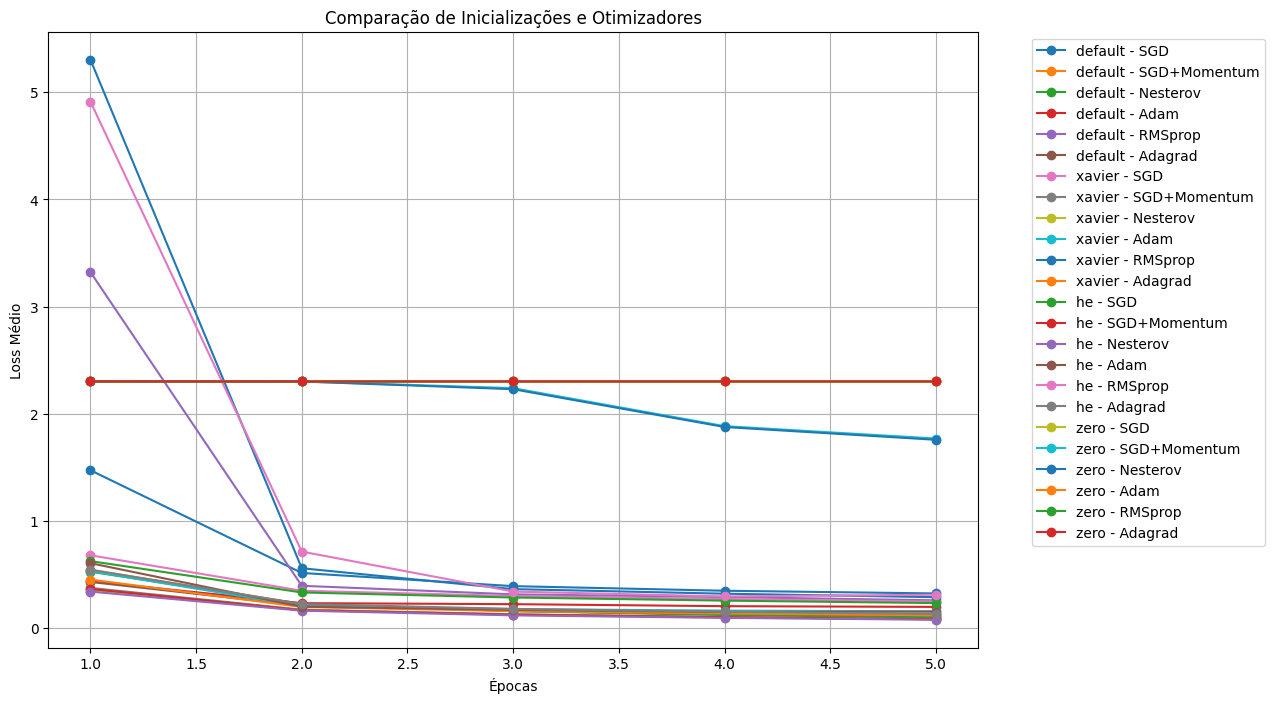

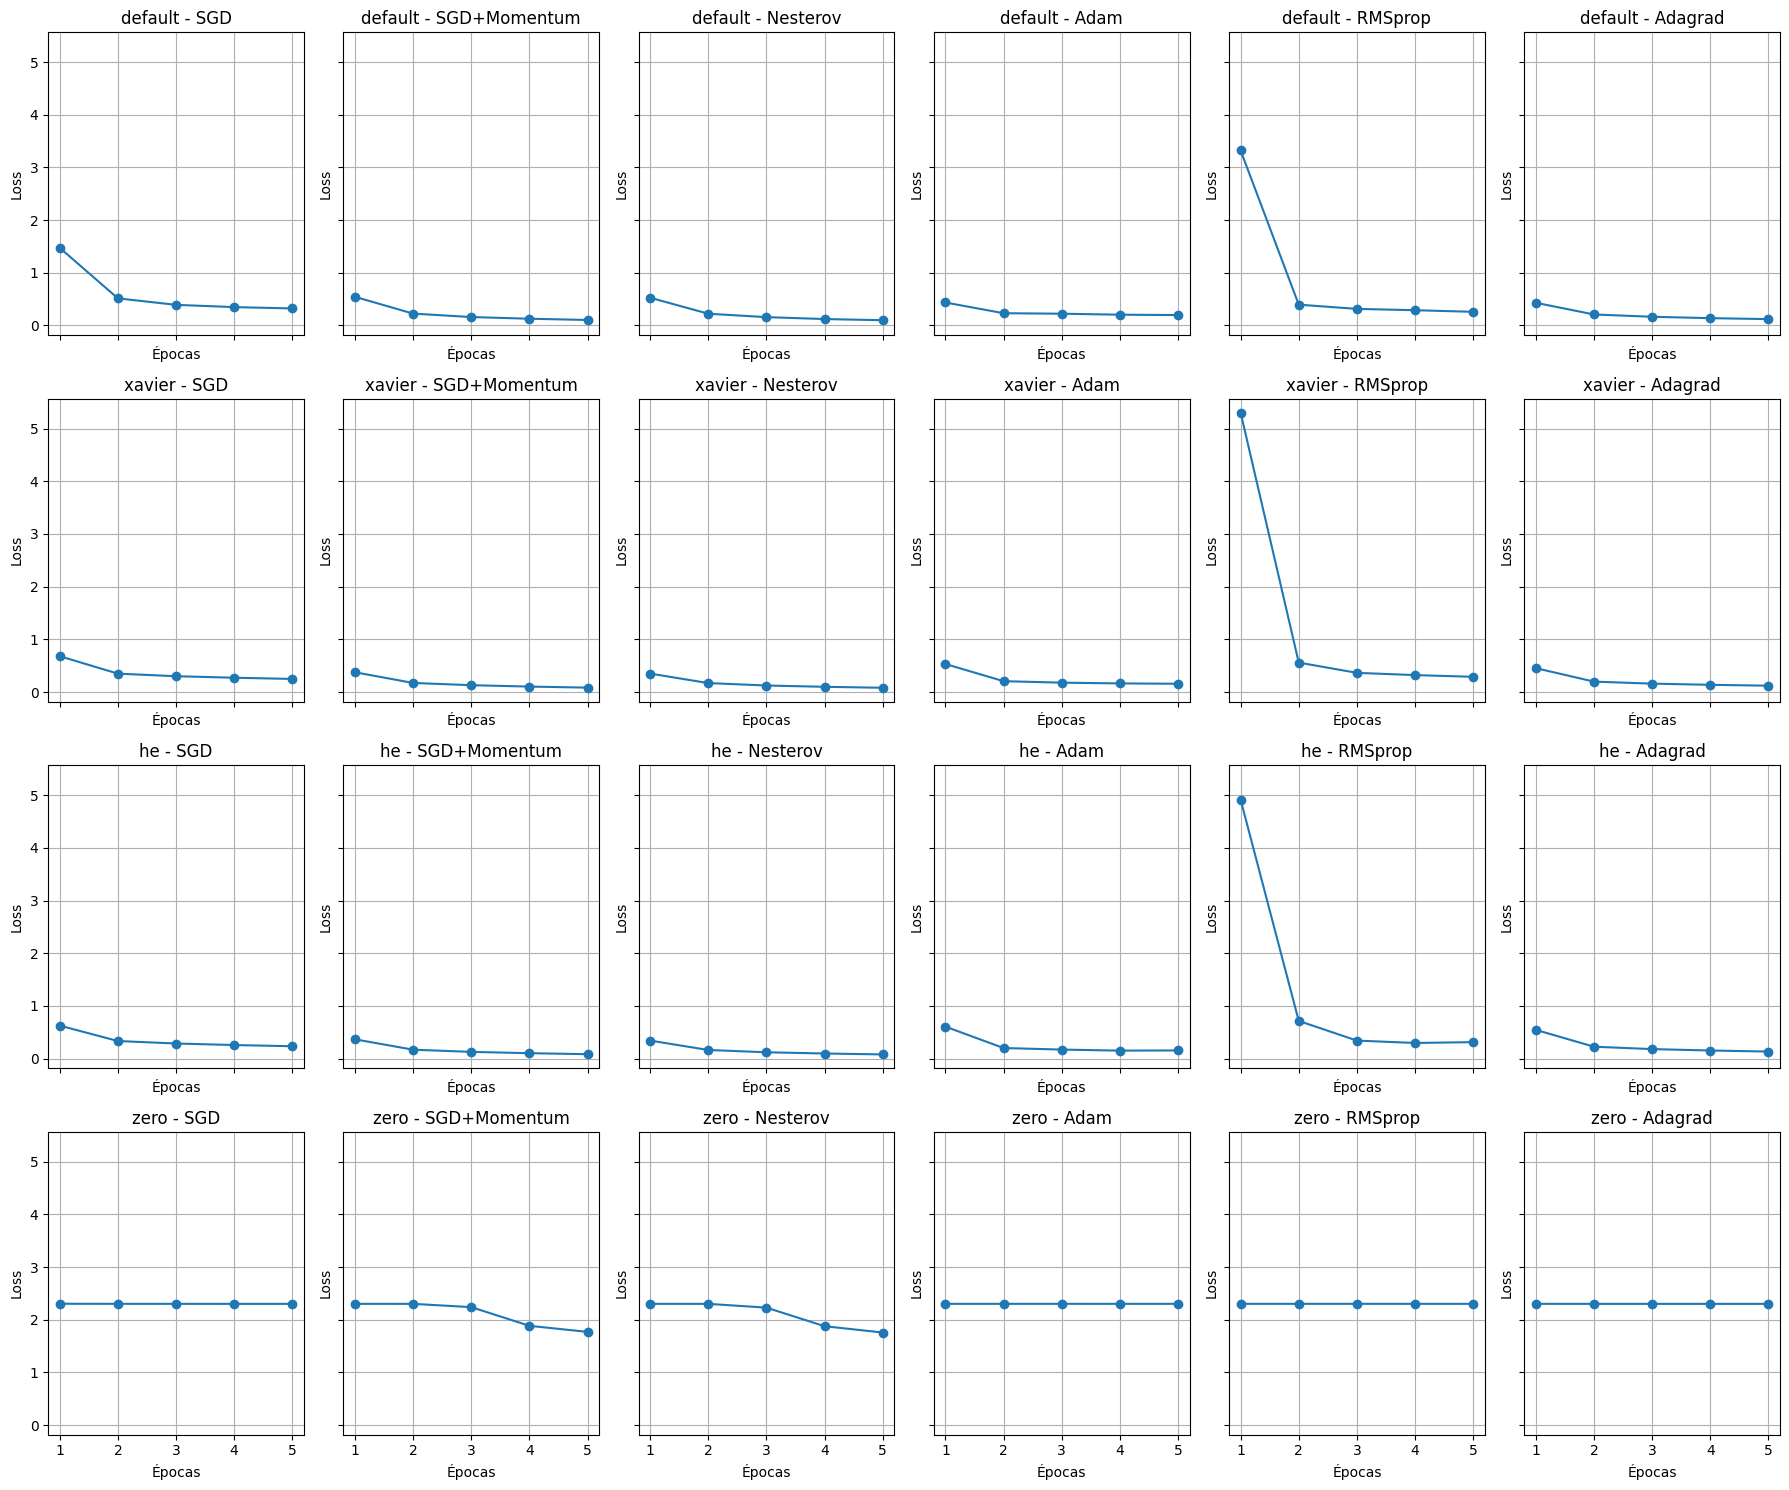

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Defini√ß√£o dos hiperpar√¢metros
batch_size = 128  # Tamanho do lote
learning_rate = 0.01  # Taxa de aprendizado
epochs = 5  # N√∫mero de √©pocas
seed_value = 42  # Valor da semente para reprodutibilidade

# Carregar e transformar o dataset MNIST
# Normaliza os valores de pixel para o intervalo [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Defini√ß√£o da rede neural MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Achata a entrada para um vetor
        x = torch.relu(self.fc1(x))  # Ativa√ß√£o ReLU na primeira camada
        x = torch.relu(self.fc2(x))  # Ativa√ß√£o ReLU na segunda camada
        x = self.fc3(x)  # Camada de sa√≠da
        return x

# Aplica√ß√£o das inicializa√ß√µes
def init_weights(model, init_method):
    if init_method == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
        nn.init.xavier_uniform_(model.fc3.weight)
    elif init_method == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc3.weight, nonlinearity='relu')
    elif init_method == "zero":
        nn.init.zeros_(model.fc1.weight)
        nn.init.zeros_(model.fc2.weight)
        nn.init.zeros_(model.fc3.weight)

# Fun√ß√£o para treinar a rede neural
def train_model(init_method, optimizer_type):
    set_seed(seed_value)  # Garante reprodutibilidade
    model = MLP()
    init_weights(model, init_method)  # Aplica a inicializa√ß√£o selecionada

    criterion = nn.CrossEntropyLoss()  # Fun√ß√£o de perda

    # Escolher o otimizador
    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == "SGD+Momentum":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_type == "Nesterov":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_type == "Adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Inicializa√ß√£o: {init_method} | Otimizador: {optimizer_type} | √âpoca [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Definir inicializa√ß√µes e otimizadores a serem testados
init_methods = ["default", "xavier", "he", "zero"]
optimizers = ["SGD", "SGD+Momentum", "Nesterov", "Adam", "RMSprop", "Adagrad"]

# Dicion√°rio para armazenar os resultados
loss_results = {}

# Treinar todas as combina√ß√µes de inicializa√ß√£o e otimizador
for init_method, opt in itertools.product(init_methods, optimizers):
    print(f"\nTreinando com Inicializa√ß√£o: {init_method} e Otimizador: {opt}\n")
    loss_results[(init_method, opt)] = train_model(init_method, opt)

# Criar gr√°fico para comparar as performances
plt.figure(figsize=(12, 8))
for (init_method, opt), losses in loss_results.items():
    label = f"{init_method} - {opt}"
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=label)

plt.xlabel("√âpocas")
plt.ylabel("Loss M√©dio")
plt.title("Compara√ß√£o de Inicializa√ß√µes e Otimizadores")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando gr√°ficos individuais
fig, axes = plt.subplots(len(init_methods), len(optimizers), figsize=(18, 15), sharex=True, sharey=True)

for i, init_method in enumerate(init_methods):
    for j, opt in enumerate(optimizers):
        axes[i, j].plot(range(1, epochs+1), loss_results[(init_method, opt)], marker='o', linestyle='-')
        axes[i, j].set_title(f"{init_method} - {opt}")
        axes[i, j].set_xlabel("√âpocas")
        axes[i, j].set_ylabel("Loss")
        axes[i, j].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()



Observando os gr√°fico, nota-se que inicializa√ß√£o zero resultou em uma linha reta para todos os casos, onde apenas SGD + Momentum e Nestereov consguiram se afastar dela um pouco. Isso indica que o modelo parou de aprender ou aprende muito pouco. No geral, para esse cen√°rio, os diferentes casos resultaram em valores relativamente pr√≥ximos, sendo a mudan√ßa mais percept√≠vel o loss inicial, principlamente do RMSprop. Al√©m disso, a inicializa√ß√£o he apresentou melhores resultados.

# 5. Reguladores

A regulariza√ß√£o √© um conjunto de t√©cnicas utilizadas para **evitar overfitting**, garantindo que a rede neural generalize bem para novos dados. Assim, essas t√©cnicas buscam reduzir a vari√¢ncia da predi√ß√£o do modelo e a complexidade dele.

## 5.1. L1 e L2 (Penalidades Lasso e Ridge)

A regulariza√ß√£o L1 e L2 **penaliza os pesos** da rede neural, adicionando um termo extra √† fun√ß√£o de perda, sendo ele diretamente proporcional ao m√≥dulo do peso para L1 ou diretamente proporcional ao quadrado do peso para L2

Assim, para L!, a nova fun√ß√£o de perda √© dada por:

$$J(w) = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat y_{i}) + \lambda \sum_{i=1}^{m}|w|$$

Onde:
- $J(w)$ √© a fun√ß√£o de custo
- $m$ √© o n√∫mero de features
- $n$ √© o n√∫mero de amostras
- $y_{i}$ √© o valor alvo
- $\hat y_{i}$ √© o valor alvo predito
- $\lambda$ √© um hiperpar√¢metro que controla a intensidade da regulariza√ß√£o



Esse c√°lculo faz com que a rede reduza os pesos, podendo chegar a 0. Isso pode ser √∫til para criar modelos mais esparsos, o que pode ajudar na interpretabilidade e pode eliminar completamente algumas conex√µes, ignorando features irrelevantes para o contexto.

Para L2:

$$J(w) = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat y_{i}) + \lambda \sum_{i=1}^{m}w^2$$

Esse c√°lculo tamb√©m faz os pesos reduzirem, por√©m pesos grandes s√£o maispenalizados do que pesos pequenos, sendo reduzidos gradualmente mas sem chrgar a 0. Isso √© √∫til quando se quer reduzir a vari√¢ncia do modelo e manter todas as vari√°veis.

## 5.2. Dropout

A t√©cnica de dropout se baseia em aleatoriamente **desligar uma parcela dos neur√¥nios durante a etapa de treinamento**, reduzindo a complexidade da rede. Durante cada passo do treinamento, cada neur√¥nio tem uma probabilidade $p$ de ser desligado e uma probabilidade $1-p$ de permanecer ligado. Quando a rede for para fase de testes, ela deve operar com todos os neur√¥nios ativos, ent√£o para compensar a falata de neur√¥nios no treinamento, os pesos das redes s√£o multiplicados pela probabilidade de perman√™ncia $1-p$. Geralmente $p=0.5$

Essa t√©cnica geralmente √© utilizada em redes neurais profundas e redes com muitas camadas densas, onde o risco de overfitting √© maior devido ao grande n√∫mero de par√¢metros, mas deve ser evittadas em modelos pequenos ou com poucos dados.

**Vantagens**:
- Aumenta a generaliza√ß√£o da rede
- Evita que a rede dependa muito de um neur√¥nio ou conex√£o espec√≠ficas

**Desvantagens**
- Aumento no tempo de treinamento
- Valores inadequados de $p$ podem gerar underfitting ou ser ineficazes contra overfitting
  

## 5.3. Batch Normalization

A ideia desse m√©todo √© **normalizar** as sa√≠das dos neur√¥nios em mini pacotes (batches) em todas as suas camadas, ou seja, deixar a distribui√ß√£o dos valores com m√©dia 0 e vari√¢ncia 1. Para cada sa√≠da $x$ de um batch √© feita a seguinte conta:

$$\hat x_{i} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^2 + \varepsilon}}$$

Ap√≥s isso, s√£o introduzidos o par√¢metros $\gamma$ e $\beta$

$$y_{i} = \gamma \hat x_{i} + \beta$$

Onde:
- $\hat x_{i}$ √©a sa√≠da ap√≥s a normaliza√ß√£o
- $\mu_{B}$ √© a m√©dia do batch
- $\sigma_{B}^2$ √© a vari√¢ncia do batche
- $\varepsilon$ √© um hiperpar√¢metro para evitar divis√µes por 0
- $y_{i}$ √© o valor da sa√≠da ap√≥s as transforma√ß√µes de $\gamma$ e $\beta$
- $\gamma$ √© o par√¢metro respons√°vol por escalonar a sa√≠da
- $\beta$ √© o par√¢metro respons√°vel por deslocar a sa√≠da

Esse m√©todo aumenta a velocidade total do treinamento e atua como regularizador, visto que as m√©dias e vari√¢ncias usadas nas normaliza√ß√µes s√£o alttamente dependentes de cada batch.

### **Como a regulariza√ß√£o interage com inicializa√ß√£o de pesos**

Intera√ß√£o entre Regulariza√ß√£o e Inicializa√ß√£o de Pesos
A regulariza√ß√£o (como L1, L2, Dropout e Batch Normalization) controla a complexidade do modelo para evitar overfitting, enquanto a inicializa√ß√£o de pesos afeta a velocidade de converg√™ncia e evita problemas como o desaparecimento ou explos√£o de gradientes. A escolha de um bom esquema de inicializa√ß√£o pode complementar ou atenuar os efeitos da regulariza√ß√£o. Aqui est√£o algumas intera√ß√µes importantes:

1. **Regulariza√ß√£o L2 (Ridge)**
- Se os pesos forem inicializados com valores muito altos, a regulariza√ß√£o L2 ter√° um efeito maior no in√≠cio do treinamento, reduzindo drasticamente os pesos e podendo desacelerar a aprendizagem.

- Inicializa√ß√µes como Xavier (Glorot) ou He geralmente j√° garantem que os pesos comecem em uma escala razo√°vel, reduzindo a necessidade de corre√ß√µes extremas via regulariza√ß√£o.

2. **Regulariza√ß√£o L1 (Lasso)**

- A regulariza√ß√£o L1 incentiva pesos esparsos, eliminando alguns completamente.
Se os pesos forem inicializados muito pequenos, a regulariza√ß√£o L1 pode zer√°-los rapidamente, tornando a rede sub√≥tima.

- Para esse caso, uma inicializa√ß√£o que garanta que os pesos n√£o sejam muito pr√≥ximos de zero pode ajudar a manter a expressividade do modelo.

3. **Dropout**

- O Dropout desativa aleatoriamente unidades durante o treinamento, reduzindo a depend√™ncia de neur√¥nios espec√≠ficos.

- Se a inicializa√ß√£o dos pesos for muito pequena, os valores das ativa√ß√µes podem cair significativamente ao longo das camadas, reduzindo a efic√°cia do modelo.

- Se for muito grande, a ativa√ß√£o de alguns neur√¥nios pode dominar o treinamento, levando a uma converg√™ncia ruim.

- Inicializa√ß√£o de He √© frequentemente usada com Dropout, pois compensa a varia√ß√£o nas ativa√ß√µes ao longo da rede.

4. **Batch Normalization**

- O Batch Normalization (BN) normaliza as ativa√ß√µes antes de cada camada, reduzindo a depend√™ncia de uma inicializa√ß√£o cuidadosa.

- Com BN, a escolha da inicializa√ß√£o ainda √© importante, mas seus efeitos s√£o mitigados porque a normaliza√ß√£o mant√©m a escala das ativa√ß√µes est√°vel durante o treinamento.

- Isso permite inicializa√ß√µes um pouco mais agressivas sem risco de gradientes explodirem ou desaparecerem.

## 5.4 Compara√ß√£o das Regulariza√ß√µes (Tensorflow e Pythorch)

A seguir ser√° feita uma compara√ß√£o de desempenho de reguladores para um mesmo cen√°rio. Nesse caso, ser√° usado o SGD na base de dados do MNIST, com fun√ß√£o de ativa√ß√£o ReLU. Ao final ser√° plotado um gr√°fico o loss m√©dio por √©pocas de todos reguladores.


Treinando modelo: Sem Regulariza√ß√£o


Treinando modelo: Com Dropout


Treinando modelo: Com BatchNorm


Treinando modelo: Com Weight Decay (L2)


Treinando modelo: Dropout + BatchNorm


Treinando modelo: Dropout + Weight Decay


Treinando modelo: BatchNorm + Weight Decay


Treinando modelo: Dropout + BatchNorm + Weight Decay



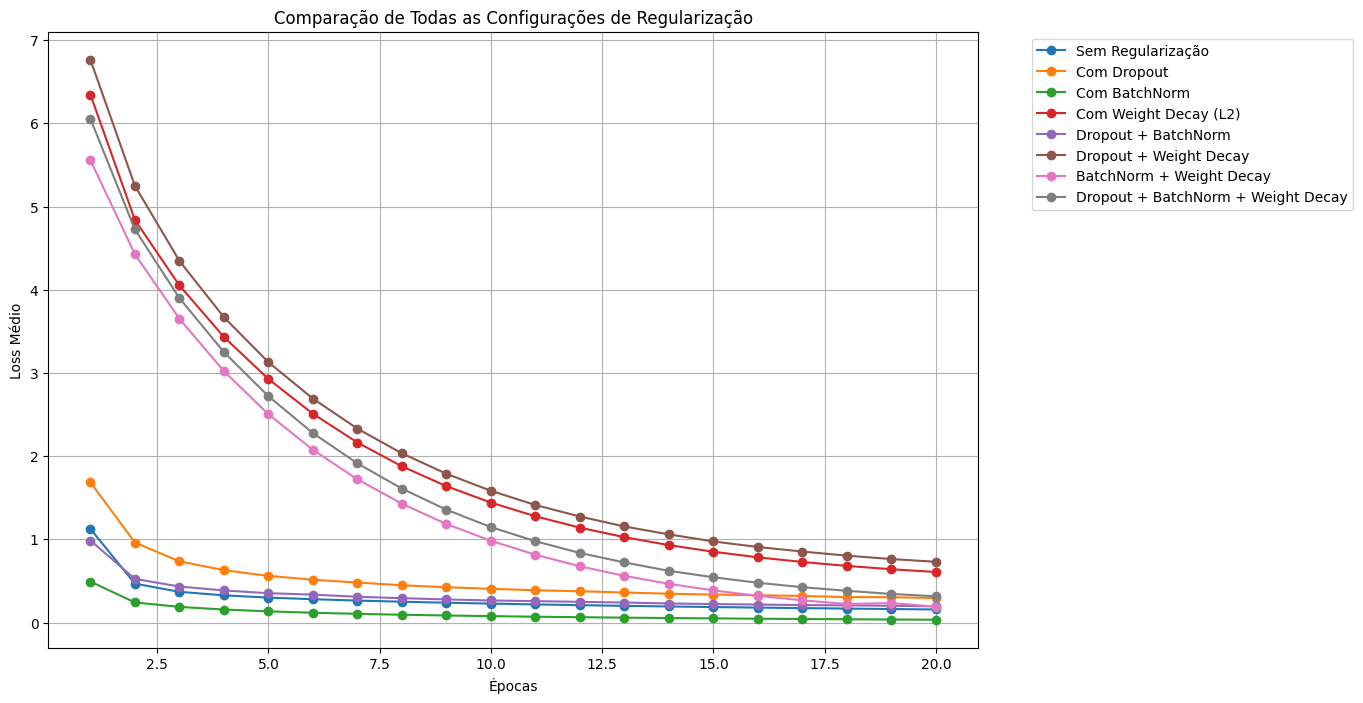

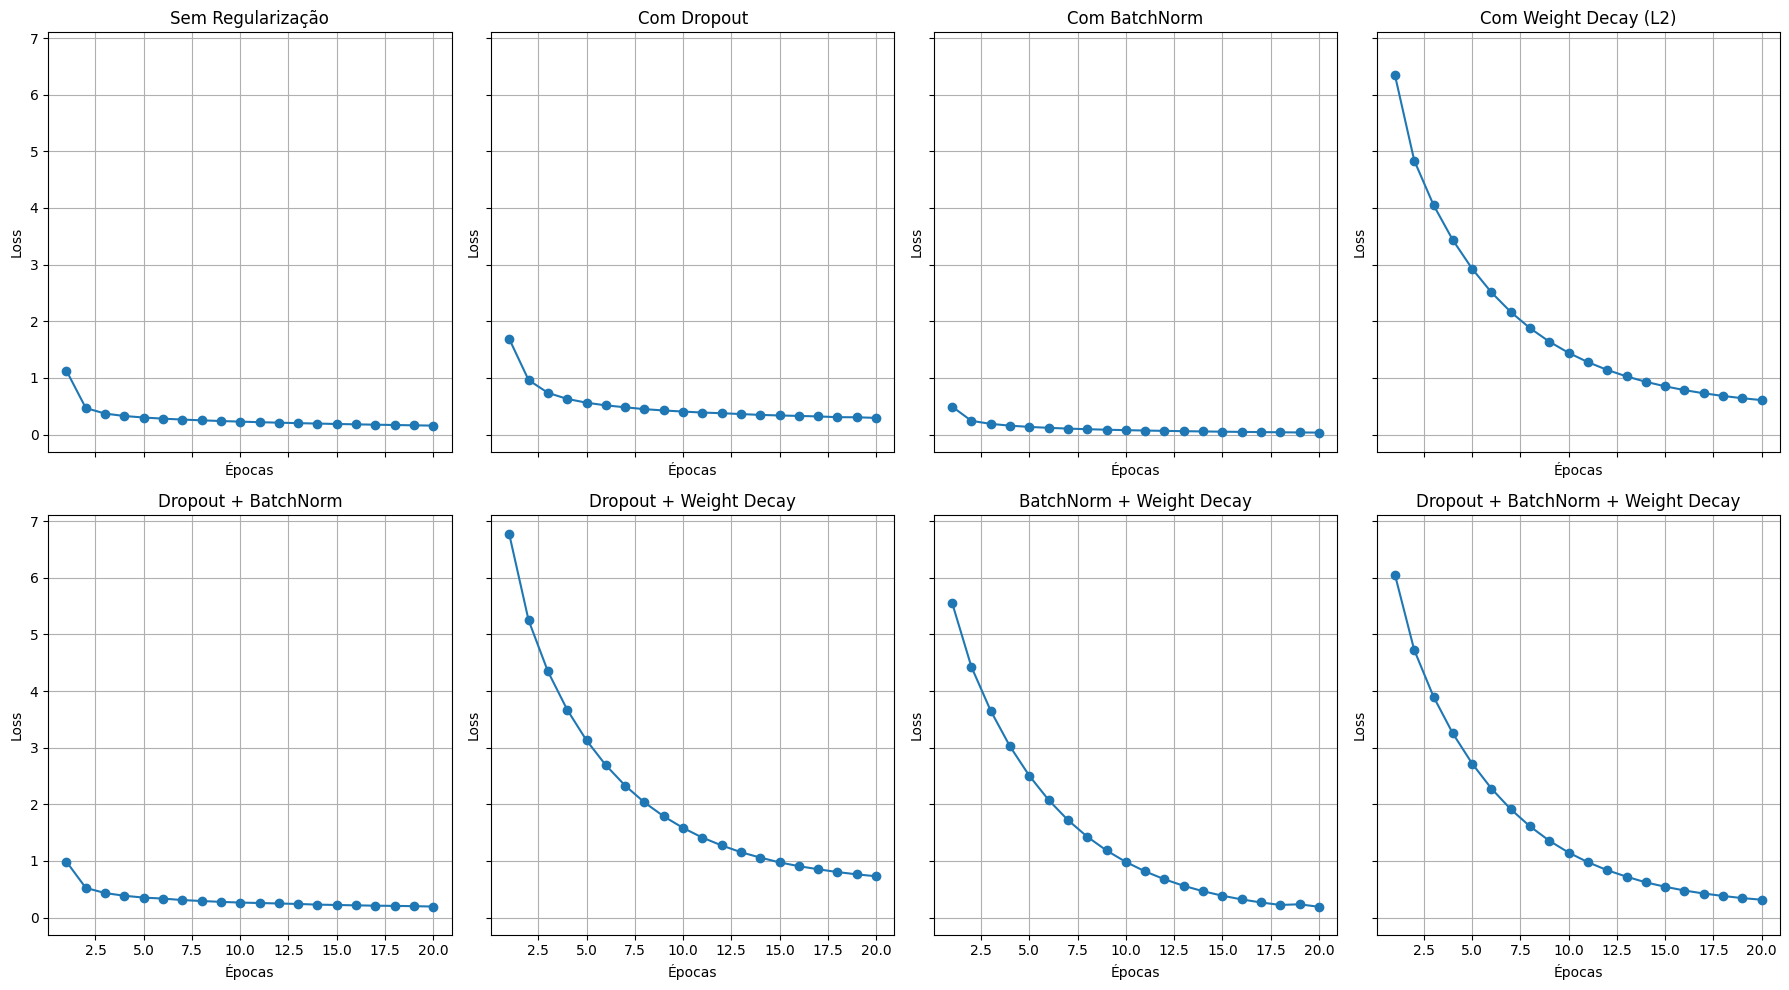

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD

# Definir a semente para garantir reprodutibilidade
# Isso assegura que os resultados ser√£o os mesmos em cada execu√ß√£o

def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Defini√ß√£o dos hiperpar√¢metros
batch_size = 128  # Tamanho do lote para treinamento
learning_rate = 0.01  # Taxa de aprendizado do otimizador
epochs = 20  # N√∫mero de √©pocas para treinamento
weight_decay_value = 0.01  # Regulariza√ß√£o L2 para evitar overfitting
dropout_rate = 0.5  # Taxa de dropout para regulariza√ß√£o
seed_value = 42  # Valor da semente para reprodutibilidade

# Carregar o dataset MNIST (d√≠gitos escritos √† m√£o)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os dados para que os valores fiquem entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionar os dados para um vetor de entrada de 784 pixels (28x28)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Fun√ß√£o para criar o modelo de rede neural
# Par√¢metros opcionais para incluir Dropout, Batch Normalization e Weight Decay
def create_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    model = Sequential()

    # Primeira camada densa com 256 neur√¥nios e ativa√ß√£o ReLU
    model.add(Dense(256, input_shape=(28 * 28,), activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay_value) if use_weight_decay else None))

    # Se batch normalization estiver ativado, adiciona a camada correspondente
    if use_batchnorm:
        model.add(BatchNormalization())

    # Se dropout estiver ativado, adiciona a camada correspondente
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Segunda camada densa com 128 neur√¥nios e ativa√ß√£o ReLU
    model.add(Dense(128, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay_value) if use_weight_decay else None))

    if use_batchnorm:
        model.add(BatchNormalization())
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Camada de sa√≠da com 10 neur√¥nios (um para cada d√≠gito) e ativa√ß√£o softmax
    model.add(Dense(10, activation='softmax'))

    return model

# Fun√ß√£o para treinar o modelo com diferentes configura√ß√µes de regulariza√ß√£o
def train_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    set_seed(seed_value)  # Garante que os resultados sejam reproduz√≠veis
    model = create_model(use_dropout, use_batchnorm, use_weight_decay)  # Cria o modelo

    # Define o otimizador SGD com a taxa de aprendizado especificada
    optimizer = SGD(learning_rate=learning_rate)

    # Compila o modelo com fun√ß√£o de perda e m√©trica de acur√°cia
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Treina o modelo sem exibir logs detalhados (verbose=0)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

    # Retorna a lista de valores de perda para cada √©poca
    return history.history['loss']

# Defini√ß√£o de diferentes configura√ß√µes de regulariza√ß√£o para testar
configs = {
    "Sem Regulariza√ß√£o": (False, False, False),
    "Com Dropout": (True, False, False),
    "Com BatchNorm": (False, True, False),
    "Com Weight Decay (L2)": (False, False, True),
    "Dropout + BatchNorm": (True, True, False),
    "Dropout + Weight Decay": (True, False, True),
    "BatchNorm + Weight Decay": (False, True, True),
    "Dropout + BatchNorm + Weight Decay": (True, True, True)
}

loss_results = {}  # Dicion√°rio para armazenar os resultados de perda

# Treinar o modelo para cada configura√ß√£o definida
for config_name, (dropout, batchnorm, weight_decay) in configs.items():
    print(f"\nTreinando modelo: {config_name}\n")
    loss_results[config_name] = train_model(dropout, batchnorm, weight_decay)

# Criar gr√°fico para comparar os desempenhos de todas as configura√ß√µes
plt.figure(figsize=(12, 8))
for config, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=config)

plt.xlabel("√âpocas")
plt.ylabel("Loss M√©dio")
plt.title("Compara√ß√£o de Todas as Configura√ß√µes de Regulariza√ß√£o")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando subplots individuais para cada configura√ß√£o de regulariza√ß√£o
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex=True, sharey=True)

config_list = list(loss_results.keys())

for i, config in enumerate(config_list):
    row, col = divmod(i, 4)  # Define a posi√ß√£o no subplot (2 linhas, 4 colunas)
    axes[row, col].plot(range(1, epochs+1), loss_results[config], marker='o', linestyle='-')
    axes[row, col].set_title(f"{config}")
    axes[row, col].set_xlabel("√âpocas")
    axes[row, col].set_ylabel("Loss")
    axes[row, col].grid(True)

# Ajustar layout para melhor visualiza√ß√£o
plt.tight_layout()
plt.show()




Treinando modelo: Sem Regulariza√ß√£o

Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [1/20], Loss: 1.4731
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [2/20], Loss: 0.5148
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [3/20], Loss: 0.3916
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [4/20], Loss: 0.3488
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [5/20], Loss: 0.3235
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [6/20], Loss: 0.3048
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [7/20], Loss: 0.2892
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [8/20], Loss: 0.2755
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [9/20], Loss: 0.2633
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [10/20], Loss: 0.2517
Dropout: False | BatchNorm: False | Weight Decay: False | √âpoca [11/20], Loss: 0.2406
Dropout: Fal

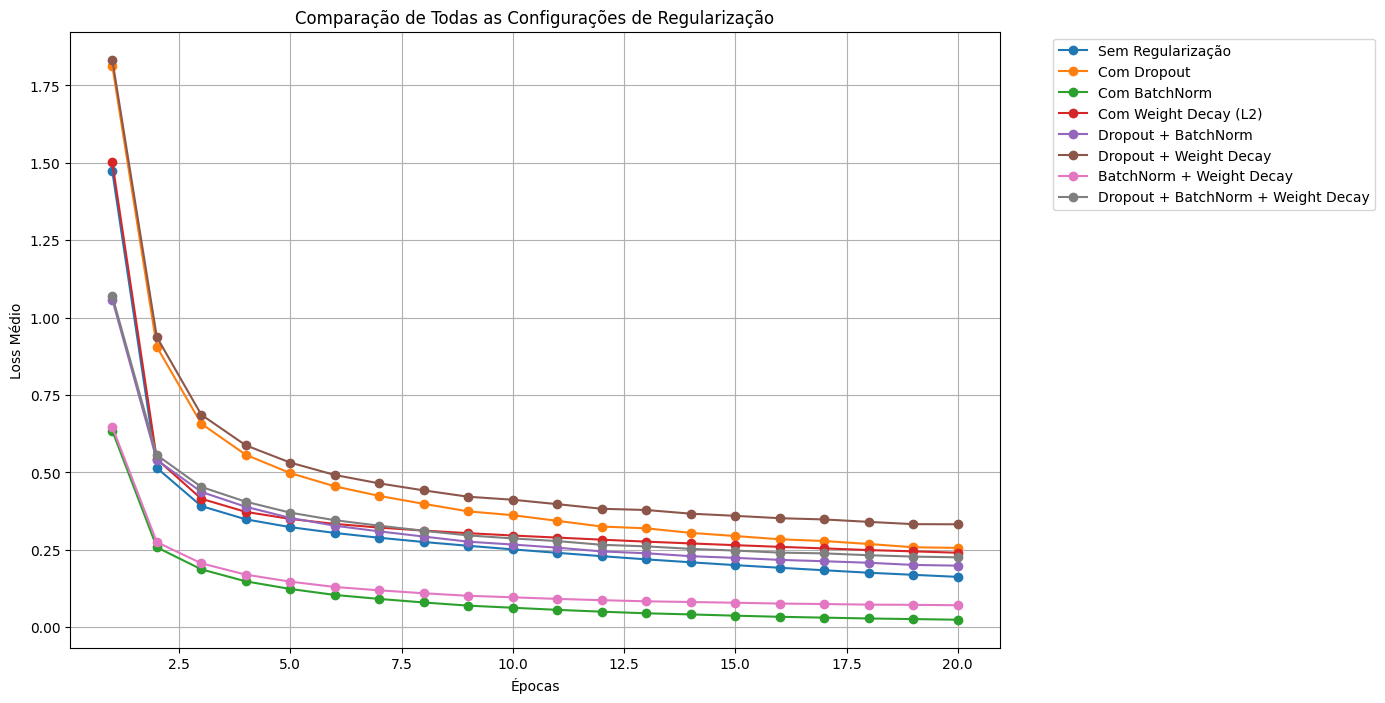

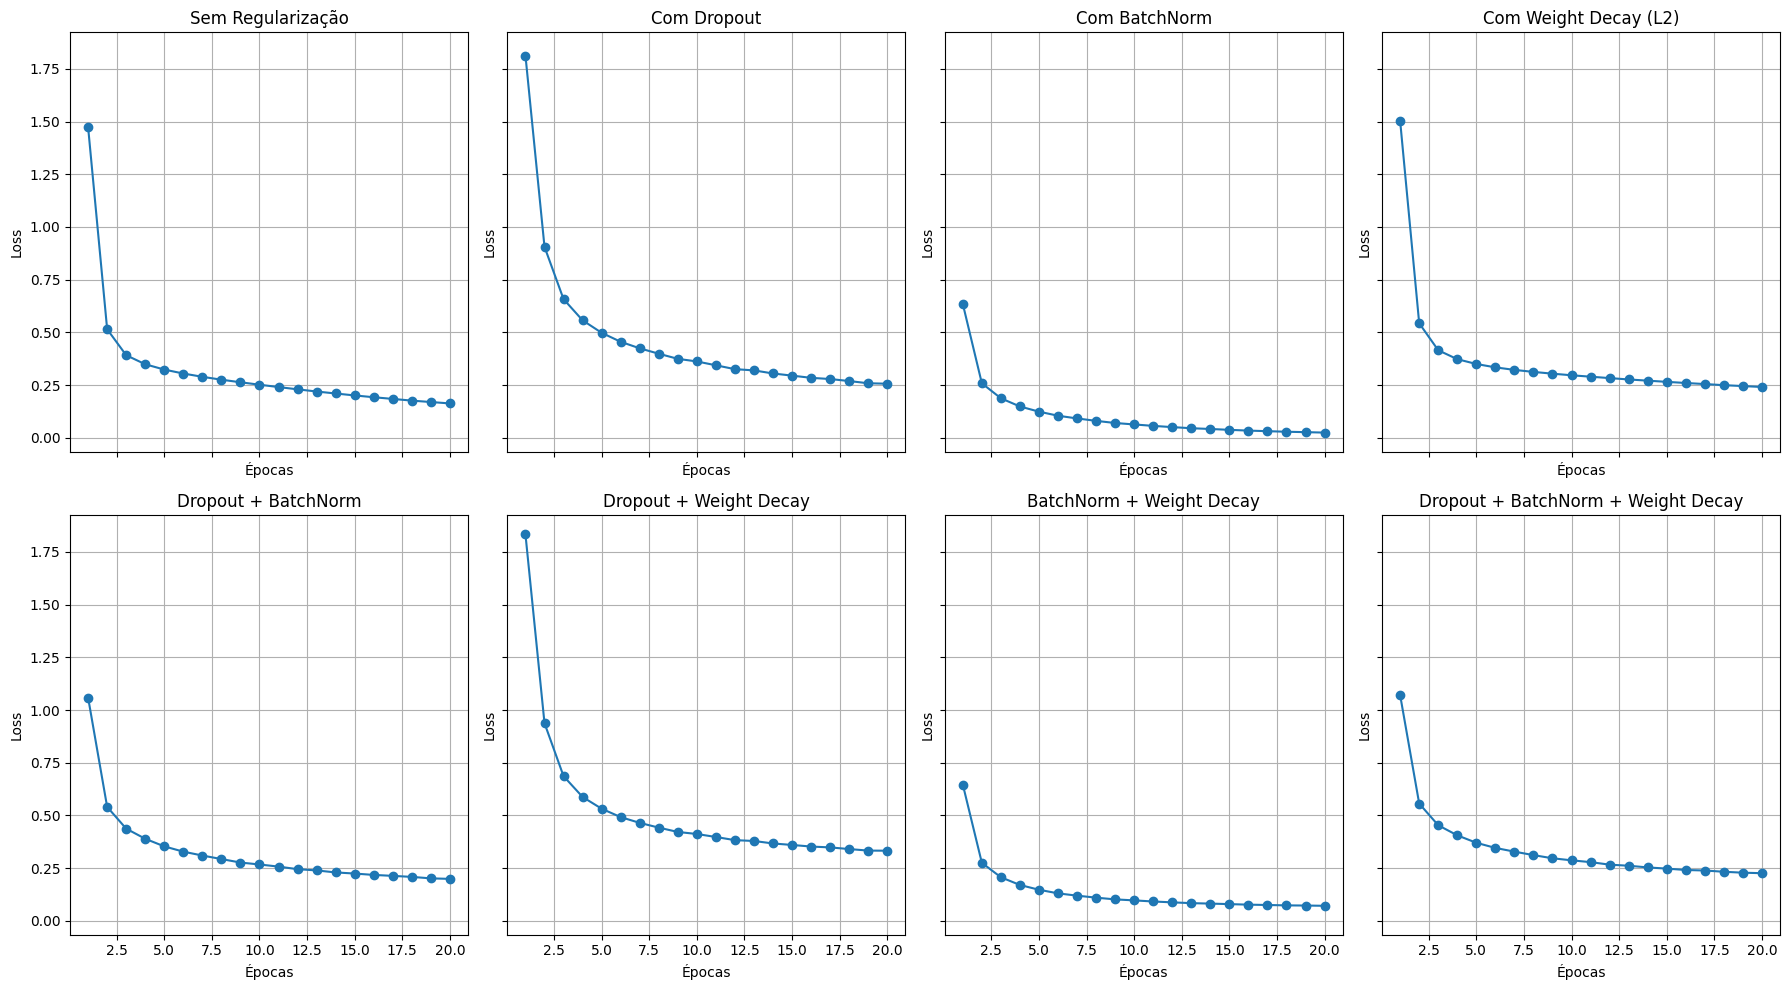

In [ ]:
# Reimportando as bibliotecas ap√≥s o reset do estado
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Defini√ß√£o dos hiperpar√¢metros
batch_size = 128
learning_rate = 0.01
epochs = 20
weight_decay_value = 0.01  # Regulariza√ß√£o L2
dropout_rate = 0.5    # Taxa de dropout
seed_value = 42

# Carregar e transformar o dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Defini√ß√£o da rede neural MLP com e sem regulariza√ß√£o
class MLP(nn.Module):
    def __init__(self, use_dropout=False, use_batchnorm=False, use_weight_decay=False):
        super(MLP, self).__init__()
        self.use_batchnorm = use_batchnorm
        self.use_dropout = use_dropout

        self.fc1 = nn.Linear(28 * 28, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_batchnorm else None
        self.dropout1 = nn.Dropout(p=dropout_rate) if use_dropout else None

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) if use_batchnorm else None
        self.dropout2 = nn.Dropout(p=dropout_rate) if use_dropout else None

        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = torch.relu(x)
        if self.use_dropout:
            x = self.dropout1(x)

        x = self.fc2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = torch.relu(x)
        if self.use_dropout:
            x = self.dropout2(x)

        x = self.fc3(x)
        return x

# Fun√ß√£o para treinar a rede neural corretamente aplicando Weight Decay
def train_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    set_seed(seed_value)  # Garante reprodutibilidade
    model = MLP(use_dropout, use_batchnorm, use_weight_decay)

    criterion = nn.CrossEntropyLoss()

    # Aplicando weight decay corretamente no otimizador
    optimizer = optim.SGD(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay_value if use_weight_decay else 0.0  # Corre√ß√£o Aqui
    )

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Dropout: {use_dropout} | BatchNorm: {use_batchnorm} | Weight Decay: {use_weight_decay} | √âpoca [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Teste das diferentes configura√ß√µes de regulariza√ß√£o
configs = {
    "Sem Regulariza√ß√£o": (False, False, False),
    "Com Dropout": (True, False, False),
    "Com BatchNorm": (False, True, False),
    "Com Weight Decay (L2)": (False, False, True),
    "Dropout + BatchNorm": (True, True, False),
    "Dropout + Weight Decay": (True, False, True),
    "BatchNorm + Weight Decay": (False, True, True),
    "Dropout + BatchNorm + Weight Decay": (True, True, True)
}

loss_results = {}

# Treinar todas as configura√ß√µes
for config_name, (dropout, batchnorm, weight_decay) in configs.items():
    print(f"\nTreinando modelo: {config_name}\n")
    loss_results[config_name] = train_model(dropout, batchnorm, weight_decay)

# Criando gr√°ficos para comparar as performances

# Gr√°fico Comparativo
plt.figure(figsize=(12, 8))
for config, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=config)

plt.xlabel("√âpocas")
plt.ylabel("Loss M√©dio")
plt.title("Compara√ß√£o de Todas as Configura√ß√µes de Regulariza√ß√£o")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando subplots individuais para cada configura√ß√£o de regulariza√ß√£o
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex=True, sharey=True)

config_list = list(loss_results.keys())

for i, config in enumerate(config_list):
    row, col = divmod(i, 4)  # Define a posi√ß√£o no subplot (2 linhas, 4 colunas)
    axes[row, col].plot(range(1, epochs+1), loss_results[config], marker='o', linestyle='-')
    axes[row, col].set_title(f"{config}")
    axes[row, col].set_xlabel("√âpocas")
    axes[row, col].set_ylabel("Loss")
    axes[row, col].grid(True)

# Ajustar layout para melhor visualiza√ß√£o
plt.tight_layout()
plt.show()


O gr√°fico mostra que o melhor desempenho foi obtido utilizando-se apenas batch normalization. Tamb√©m nota-se que a curva para o treinamento sem nenhum regulador se saiu melhor do que curvas com m√∫ltiplos reguladores. Isso mostra que √© importante levar em considera√ß√£o o contexto do problema para escolher uma boa op√ß√£o, visto que aplicar v√°rias t√©cnicas indiscriminadamente pode resultar em desemenhos piores

# 6. Learning Rate Scheduling: Melhorando a Converg√™ncia

## 6.1 O que s√£o Schedulers e Por que Usar?

Os schedulers de taxa de aprendizado s√£o t√©cnicas utilizadas para ajustar a taxa de aprendizado durante o treinamento de modelos de aprendizado de m√°quina. A taxa de aprendizado (learning rate) √© um hiperpar√¢metro crucial que determina o qu√£o grande ser√° o passo de atualiza√ß√£o dos pesos do modelo em cada itera√ß√£o. Se a taxa de aprendizado for muito alta, o modelo pode pular o m√≠nimo global, resultando em uma m√° converg√™ncia. Por outro lado, se for muito baixa, o treinamento pode ser extremamente lento.
## 6.2 Benef√≠cios dos Schedulers:

Acelera√ß√£o da Converg√™ncia: Ajustar a taxa de aprendizado ao longo do treinamento pode ajudar o modelo a convergir mais rapidamente.

Evitar M√≠nimos Locais: Uma taxa de aprendizado adaptativa pode ajudar o modelo a sair de m√≠nimos locais e encontrar uma solu√ß√£o melhor.

Estabilidade do Treinamento: Reduzir a taxa de aprendizado de forma adequada pode estabilizar o processo de treinamento e melhorar a performance geral.

## 6.3 Principais Tipos de Agendadores de Taxa de Aprendizado

##StepLR (Redu√ß√£o por Steps Fixos)

O StepLR reduz a taxa de aprendizado em intervalos regulares (steps). Isso pode ser √∫til em situa√ß√µes onde o treinamento inicial r√°pido √© desejado, mas uma taxa de aprendizado menor √© necess√°ria para ajuste fino nos est√°gios posteriores.

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(100):
    # treinamento
    # Sample input (replace with your actual training data)
    inputs = torch.randn(1, 10)
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(inputs) # perform a forward pass
    loss = outputs.sum()  # Sample loss (replace with your actual loss)
    loss.backward() #calculate the gradients
    optimizer.step() # update the weights

    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")

Epoch 0, LR: 0.1
Epoch 1, LR: 0.1
Epoch 2, LR: 0.1
Epoch 3, LR: 0.1
Epoch 4, LR: 0.1
Epoch 5, LR: 0.1
Epoch 6, LR: 0.1
Epoch 7, LR: 0.1
Epoch 8, LR: 0.1
Epoch 9, LR: 0.1
Epoch 10, LR: 0.1
Epoch 11, LR: 0.1
Epoch 12, LR: 0.1
Epoch 13, LR: 0.1
Epoch 14, LR: 0.1
Epoch 15, LR: 0.1
Epoch 16, LR: 0.1
Epoch 17, LR: 0.1
Epoch 18, LR: 0.1
Epoch 19, LR: 0.1
Epoch 20, LR: 0.1
Epoch 21, LR: 0.1
Epoch 22, LR: 0.1
Epoch 23, LR: 0.1
Epoch 24, LR: 0.1
Epoch 25, LR: 0.1
Epoch 26, LR: 0.1
Epoch 27, LR: 0.1
Epoch 28, LR: 0.1
Epoch 29, LR: 0.010000000000000002
Epoch 30, LR: 0.010000000000000002
Epoch 31, LR: 0.010000000000000002
Epoch 32, LR: 0.010000000000000002
Epoch 33, LR: 0.010000000000000002
Epoch 34, LR: 0.010000000000000002
Epoch 35, LR: 0.010000000000000002
Epoch 36, LR: 0.010000000000000002
Epoch 37, LR: 0.010000000000000002
Epoch 38, LR: 0.010000000000000002
Epoch 39, LR: 0.010000000000000002
Epoch 40, LR: 0.010000000000000002
Epoch 41, LR: 0.010000000000000002
Epoch 42, LR: 0.01000000000000000

#ExponentialLR (Decaimento Exponencial)

O ExponentialLR aplica um decaimento exponencial √† taxa de aprendizado, o que pode ser vantajoso em cen√°rios onde um decaimento gradual √© prefer√≠vel.


In [ ]:
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 9.000000000000003e-05
Epoch 1, LR: 8.100000000000003e-05
Epoch 2, LR: 7.290000000000002e-05
Epoch 3, LR: 6.561000000000002e-05
Epoch 4, LR: 5.904900000000002e-05
Epoch 5, LR: 5.314410000000002e-05
Epoch 6, LR: 4.782969000000002e-05
Epoch 7, LR: 4.304672100000002e-05
Epoch 8, LR: 3.874204890000002e-05
Epoch 9, LR: 3.4867844010000016e-05
Epoch 10, LR: 3.138105960900002e-05
Epoch 11, LR: 2.8242953648100018e-05
Epoch 12, LR: 2.5418658283290016e-05
Epoch 13, LR: 2.2876792454961016e-05
Epoch 14, LR: 2.0589113209464913e-05
Epoch 15, LR: 1.8530201888518422e-05
Epoch 16, LR: 1.667718169966658e-05
Epoch 17, LR: 1.5009463529699922e-05
Epoch 18, LR: 1.350851717672993e-05
Epoch 19, LR: 1.2157665459056937e-05
Epoch 20, LR: 1.0941898913151244e-05
Epoch 21, LR: 9.84770902183612e-06
Epoch 22, LR: 8.862938119652508e-06
Epoch 23, LR: 7.976644307687257e-06
Epoch 24, LR: 7.1789798769185315e-06
Epoch 25, LR: 6.461081889226678e-06
Epoch 26, LR: 5.81497370030401e-06
Epoch 27, LR: 5.23347633027361

#Cosine Annealing (Ajuste Suave da Taxa de Aprendizado)

O CosineAnnealingLR ajusta a taxa de aprendizado de forma suave usando a fun√ß√£o cosseno, o que pode ser ben√©fico para evitar grandes oscila√ß√µes na taxa de aprendizado e proporcionar uma converg√™ncia mais suave.

In [ ]:
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 2.653519246092244e-09
Epoch 1, LR: 2.6456676605720586e-09
Epoch 2, LR: 2.6326161188191985e-09
Epoch 3, LR: 2.6144161293062797e-09
Epoch 4, LR: 2.5911395190771263e-09
Epoch 5, LR: 2.5628781502782404e-09
Epoch 6, LR: 2.5297435576208802e-09
Epoch 7, LR: 2.491866508204508e-09
Epoch 8, LR: 2.449396485438794e-09
Epoch 9, LR: 2.402501099100885e-09
Epoch 10, LR: 2.3513654238561938e-09
Epoch 11, LR: 2.2961912688532425e-09
Epoch 12, LR: 2.237196381275155e-09
Epoch 13, LR: 2.1746135869910005e-09
Epoch 14, LR: 2.108689871698461e-09
Epoch 15, LR: 2.0396854061841133e-09
Epoch 16, LR: 1.967872519548203e-09
Epoch 17, LR: 1.893534624446094e-09
Epoch 18, LR: 1.8169650985880007e-09
Epoch 19, LR: 1.738466126911196e-09
Epoch 20, LR: 1.6583475089941193e-09
Epoch 21, LR: 1.5769254364189753e-09
Epoch 22, LR: 1.4945212449080105e-09
Epoch 23, LR: 1.4114601461582246e-09
Epoch 24, LR: 1.3280699443793771e-09
Epoch 25, LR: 1.2446797426005297e-09
Epoch 26, LR: 1.161618643850744e-09
Epoch 27, LR: 1.07921

## 6.4 Intera√ß√£o entre Schedulers e Inicializa√ß√£o de Pesos


A inicializa√ß√£o dos pesos do modelo pode ter um impacto significativo na efic√°cia dos schedulers. Inicializa√ß√µes inadequadas podem resultar em um desempenho ruim, mesmo com a otimiza√ß√£o da taxa de aprendizado. Por exemplo, se os pesos forem inicializados com valores muito grandes ou muito pequenos, o treinamento pode se tornar inst√°vel ou extremamente lento. Um bom ponto de partida √© usar m√©todos de inicializa√ß√£o como Xavier ou He, dependendo da ativa√ß√£o usada no modelo.

## 6.5 Testes Pr√°ticos Comparando Diferentes Schedulers

Vamos comparar os diferentes schedulers com um exemplo pr√°tico utilizando um conjunto de dados simples.

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


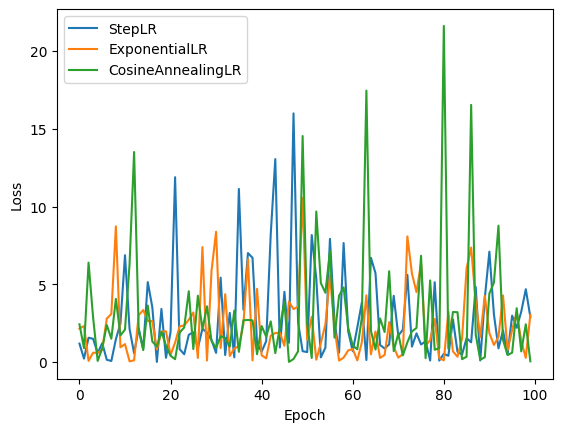

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

def train(model, optimizer, scheduler, epochs=100):
    losses = []
    for epoch in range(epochs):
        # Treinamento do modelo
        inputs = torch.randn(1, 10) # dummy input
        target = torch.randn(1, 2) # dummy target
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target) #calculate loss
        losses.append(loss.item()) # append the numerical value of the loss, not the tensor
        loss.backward()
        optimizer.step()
        scheduler.step()

    return losses

# Schedulers
schedulers = {
    'StepLR': optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1),
    'ExponentialLR': optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
    'CosineAnnealingLR': optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
}

# Treinando e plotando resultados
for name, scheduler in schedulers.items():
    # reinitialize the model and optimizer for each scheduler to be compared
    model = nn.Linear(10, 2)
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = train(model, optimizer, scheduler)
    plt.plot(losses, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#7.  Avalia√ß√£o Final e Conclus√µes

##Curvas de Aprendizado (Loss x √âpoca) para Cada Experimento

As curvas de aprendizado mostram a evolu√ß√£o da fun√ß√£o de perda ao longo das √©pocas de treinamento. Elas s√£o cruciais para entender o comportamento do modelo e a efic√°cia dos schedulers.

##Compara√ß√£o entre os Diferentes M√©todos

Ao comparar os diferentes m√©todos de agendamento de taxa de aprendizado, podemos observar as varia√ß√µes na converg√™ncia e estabilidade do treinamento. Por exemplo, o StepLR pode ser mais eficaz em situa√ß√µes onde ajustes bruscos s√£o aceit√°veis, enquanto o Cosine Annealing pode proporcionar uma converg√™ncia mais suave.

##Impacto Conjunto da Inicializa√ß√£o, Otimizadores, Regulariza√ß√£o e Schedulers

A combina√ß√£o desses fatores desempenha um papel essencial no desempenho final do modelo. Inicializa√ß√µes adequadas de pesos, a escolha correta de otimizadores (como Adam, SGD), t√©cnicas de regulariza√ß√£o (como dropout, weight decay) e o uso de schedulers de taxa de aprendizado podem resultar em um modelo mais robusto e eficaz.

##Conclus√£o sobre Melhores Estrat√©gias

A melhor estrat√©gia depende do problema espec√≠fico. No entanto, uma abordagem equilibrada que combina inicializa√ß√£o de pesos, otimiza√ß√£o, regulariza√ß√£o e schedulers de taxa de aprendizado geralmente leva a melhores resultados. Experimentar diferentes combina√ß√µes e analisar as curvas de aprendizado pode fornecer insights valiosos para ajustar a estrat√©gia de treinamento.